<a href="https://colab.research.google.com/github/flashhhhh/MNIST-using-MobileNetV1/blob/main/MNIST_using_MobileNetV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Import library
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import keras.utils as np_utils
from keras.datasets import mnist
from keras.layers import Input, Activation, Conv2D, DepthwiseConv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Download MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Format data
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

num_classes = 10
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [7]:
# Build MobileNet
i = Input(X_train[0].shape)
x = DepthwiseConv2D(kernel_size=3, strides=1, padding="same", depth_multiplier=1)(i)
x = BatchNormalization()(x)
x = Conv2D(32, (1, 1),  padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = DepthwiseConv2D(kernel_size=3, strides=1, padding="same", depth_multiplier=1)(x)
x = BatchNormalization()(x)
x = Conv2D(32, (1, 1),  padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D((2, 2))(x)

x = DepthwiseConv2D(kernel_size=3, strides=1, padding="same", depth_multiplier=1)(x)
x = BatchNormalization()(x)
x = Conv2D(64, (1, 1),  padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = DepthwiseConv2D(kernel_size=3, strides=1, padding="same", depth_multiplier=1)(x)
x = BatchNormalization()(x)
x = Conv2D(64, (1, 1),  padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)

x = Dropout(0.2)(x)
x = Dense(num_classes, activation="softmax")(x)

model = Model(i, x)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 depthwise_conv2d_1 (Depthw  (None, 28, 28, 1)         10        
 iseConv2D)                                                      
                                                                 
 batch_normalization_2 (Bat  (None, 28, 28, 1)         4         
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        64        
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                             

In [8]:
# Set up train data
train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, height_shift_range=0.08, zoom_range=0.08, shear_range=0.3)
test_gen = ImageDataGenerator()

train_generator = train_gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [9]:
model.fit(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5
468/468 [==============================] - 225s 471ms/step - loss: 0.1870 - accuracy: 0.9415 - val_loss: 2.1024 - val_accuracy: 0.4910
Epoch 2/5
468/468 [==============================] - 212s 453ms/step - loss: 0.0838 - accuracy: 0.9739 - val_loss: 0.3299 - val_accuracy: 0.9042
Epoch 3/5
468/468 [==============================] - 217s 463ms/step - loss: 0.0672 - accuracy: 0.9794 - val_loss: 0.2188 - val_accuracy: 0.9315
Epoch 4/5
468/468 [==============================] - 216s 462ms/step - loss: 0.0573 - accuracy: 0.9818 - val_loss: 0.1448 - val_accuracy: 0.9578
Epoch 5/5
468/468 [==============================] - 211s 451ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.1092 - val_accuracy: 0.9677


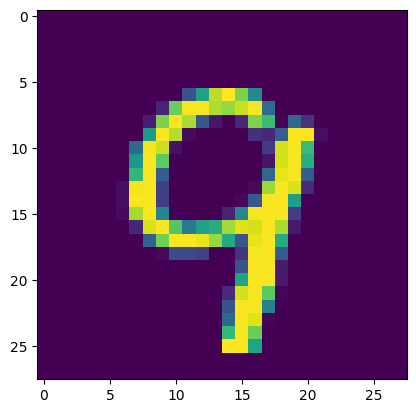

Predict: 7
Original: 9


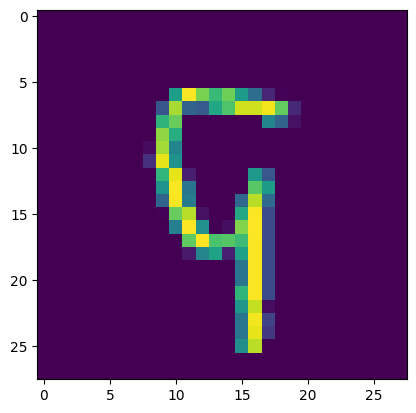

Predict: 7
Original: 9


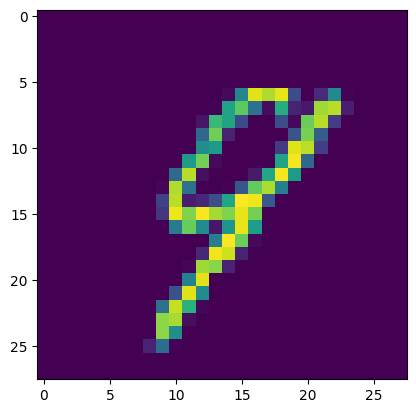

Predict: 3
Original: 9


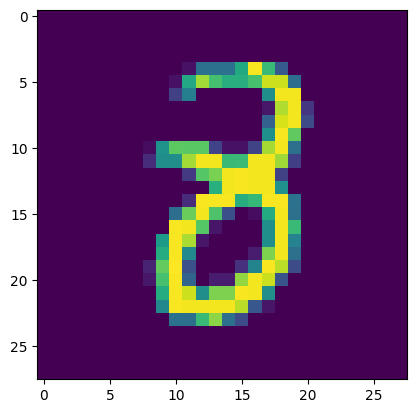

Predict: 3
Original: 8


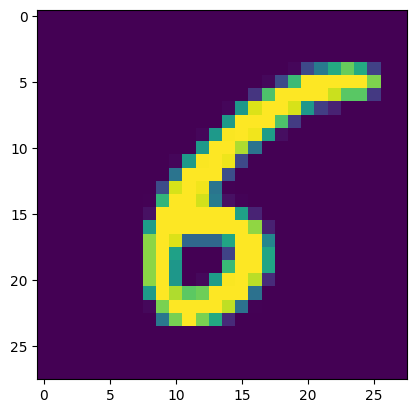

Predict: 5
Original: 6


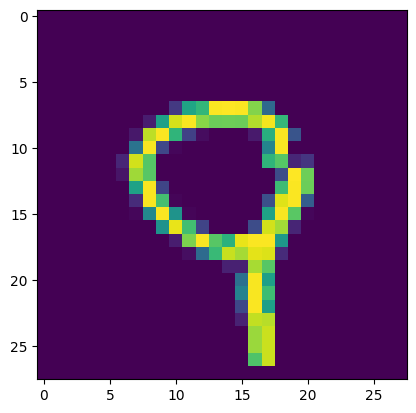

Predict: 7
Original: 9


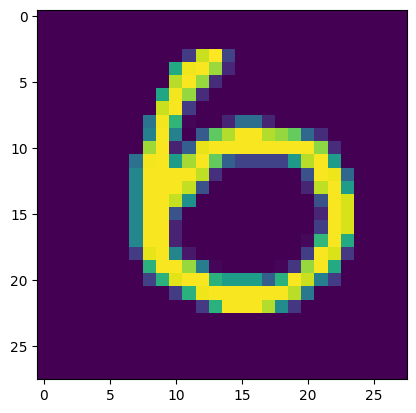

Predict: 0
Original: 6


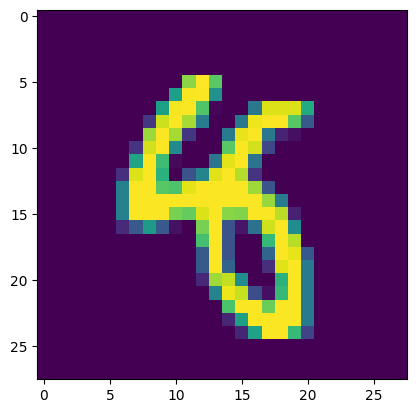

Predict: 5
Original: 8


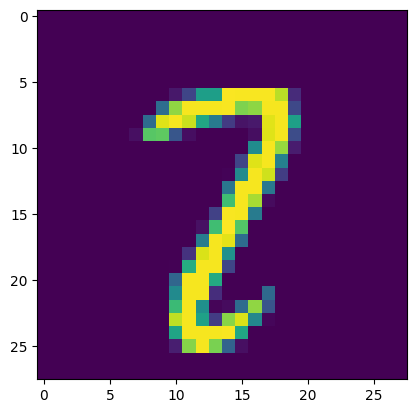

Predict: 7
Original: 2


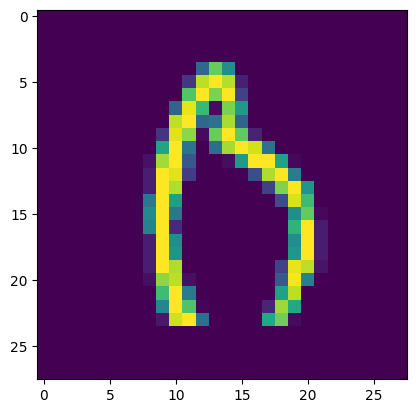

Predict: 5
Original: 0


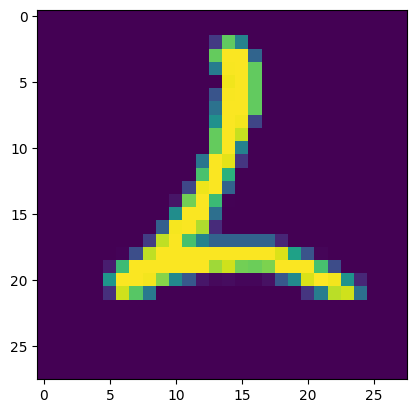

Predict: 1
Original: 2


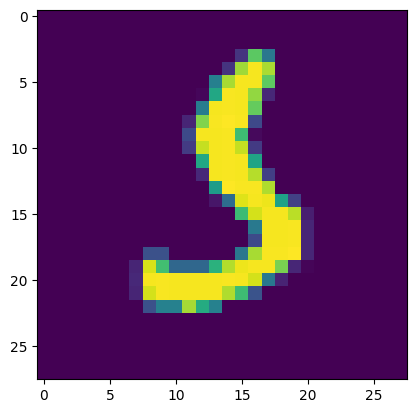

Predict: 3
Original: 5


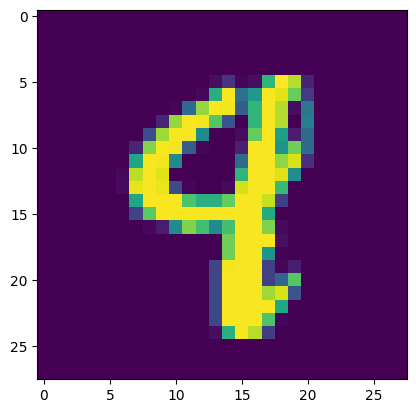

Predict: 4
Original: 9


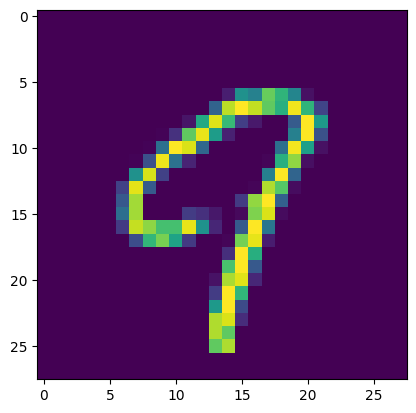

Predict: 7
Original: 9


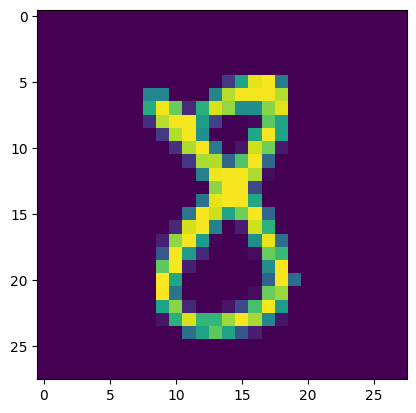

Predict: 3
Original: 8


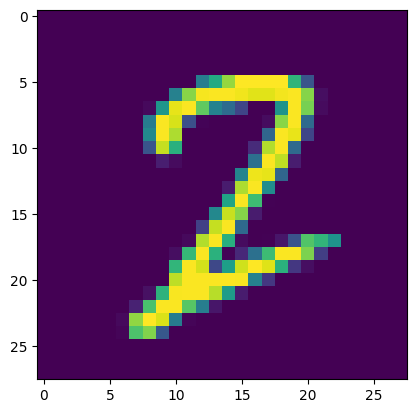

Predict: 7
Original: 2


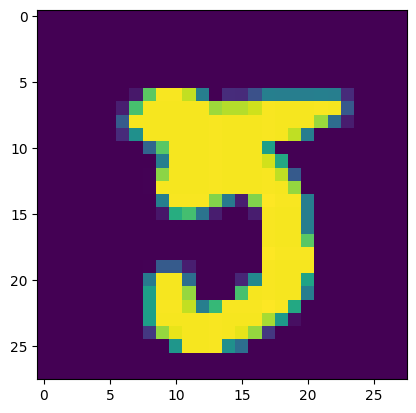

Predict: 3
Original: 5


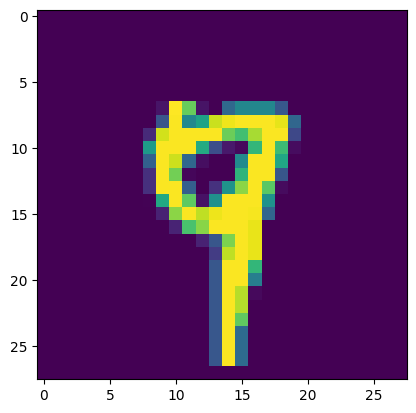

Predict: 7
Original: 9


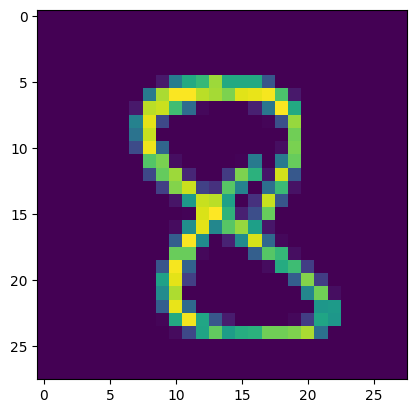

Predict: 2
Original: 8


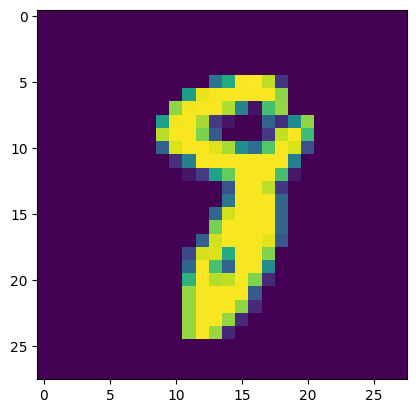

Predict: 9
Original: 8


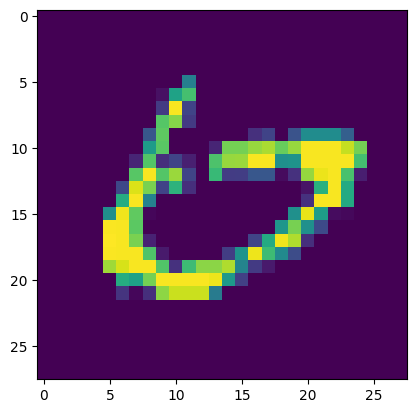

Predict: 0
Original: 6


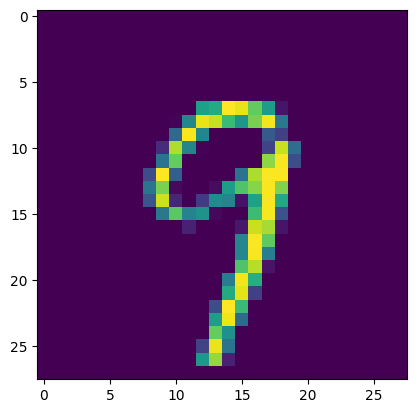

Predict: 7
Original: 9


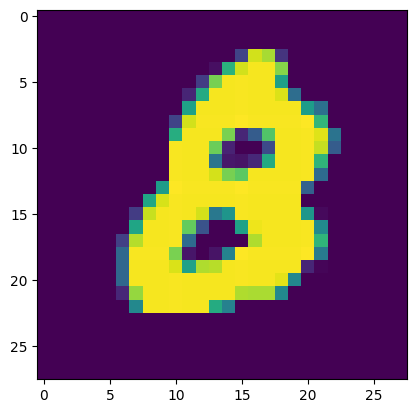

Predict: 0
Original: 8


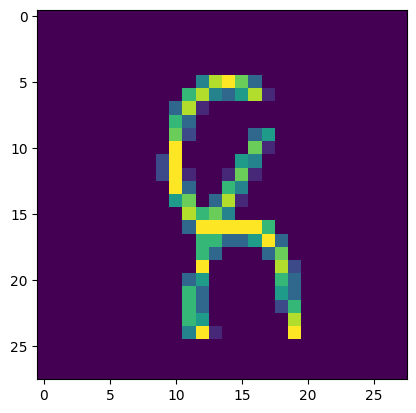

Predict: 3
Original: 8


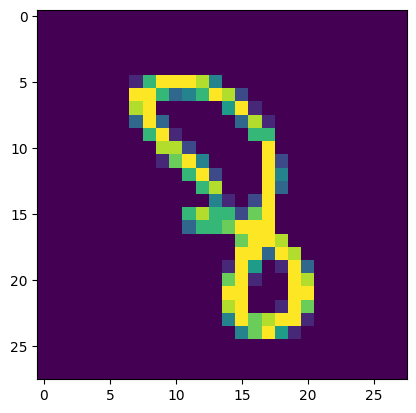

Predict: 3
Original: 8


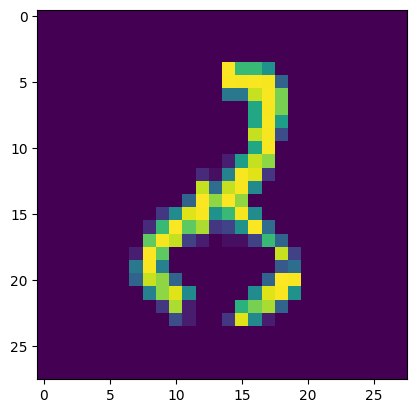

Predict: 3
Original: 8


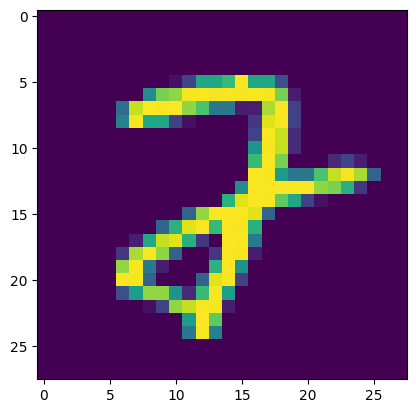

Predict: 7
Original: 2


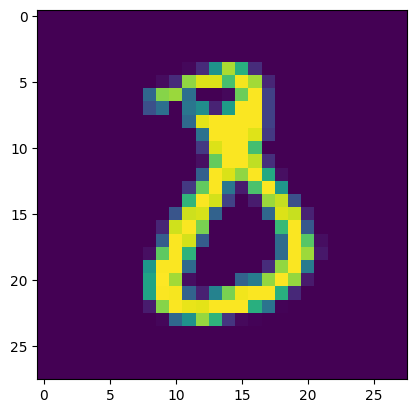

Predict: 3
Original: 8


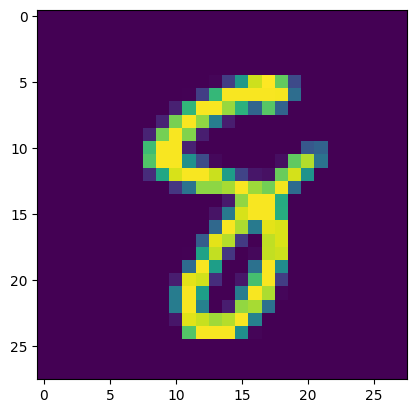

Predict: 3
Original: 8


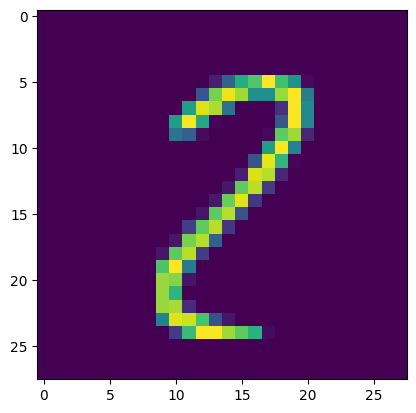

Predict: 3
Original: 2


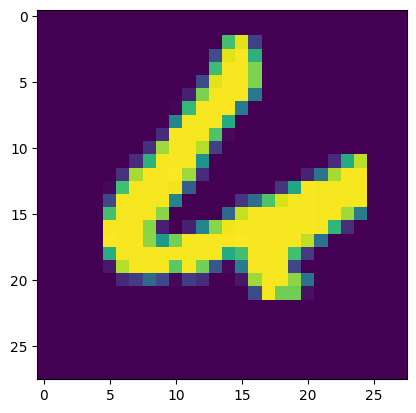

Predict: 4
Original: 6


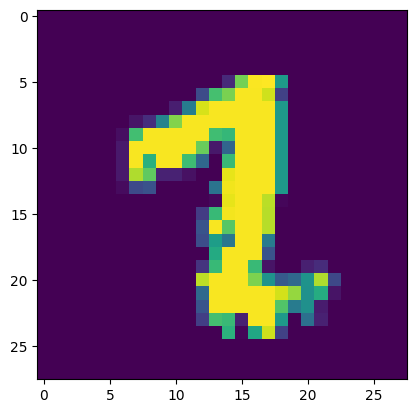

Predict: 7
Original: 2


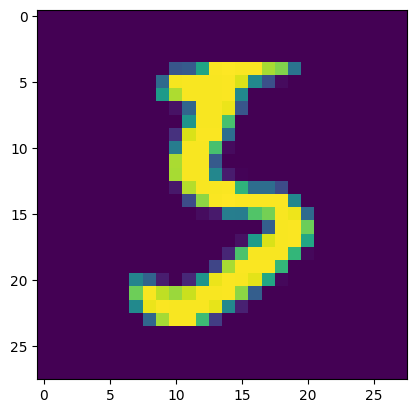

Predict: 3
Original: 5


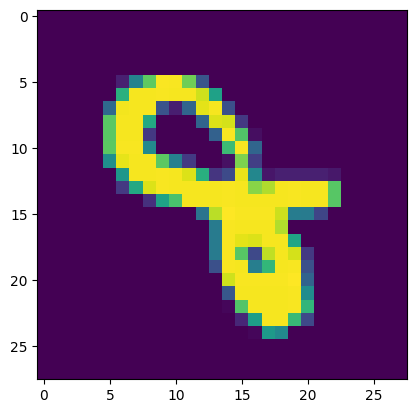

Predict: 9
Original: 8


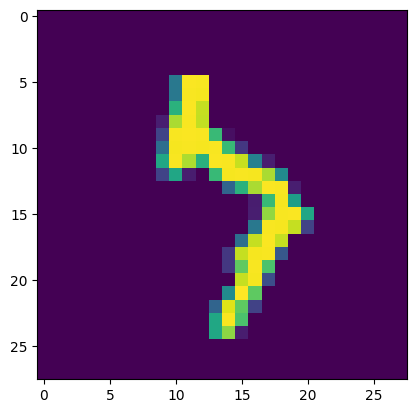

Predict: 3
Original: 7


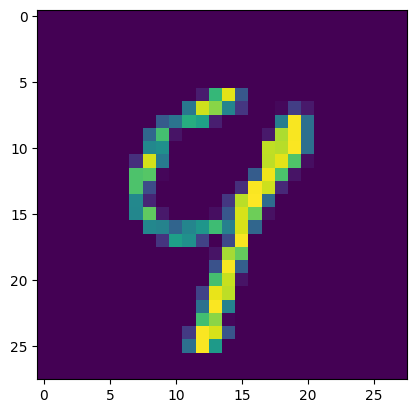

Predict: 7
Original: 9


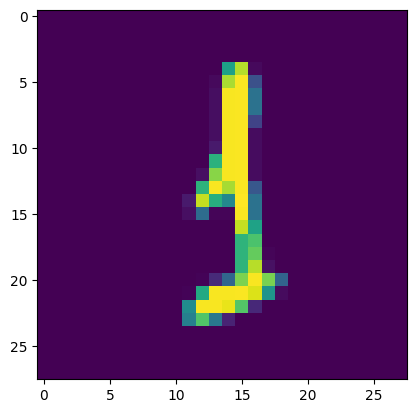

Predict: 3
Original: 1


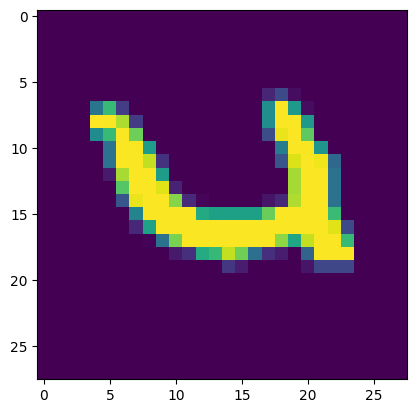

Predict: 2
Original: 4


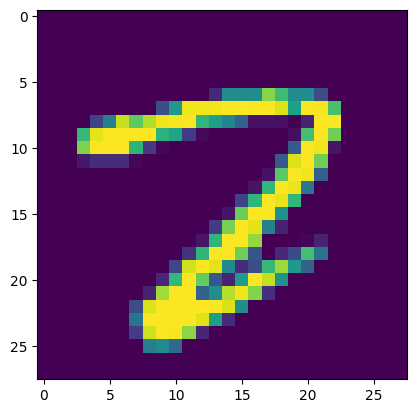

Predict: 7
Original: 2


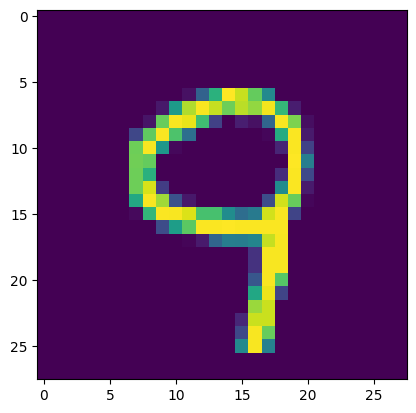

Predict: 7
Original: 9


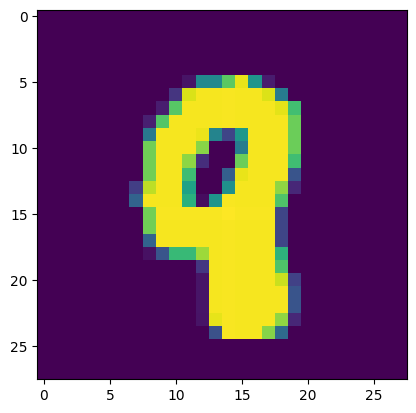

Predict: 9
Original: 8


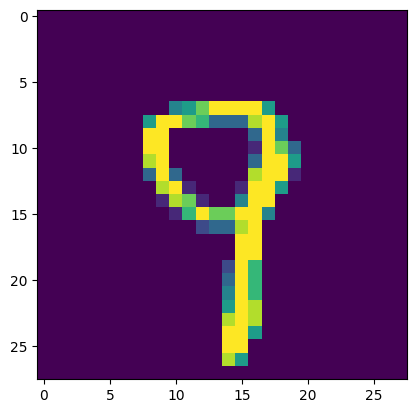

Predict: 7
Original: 9


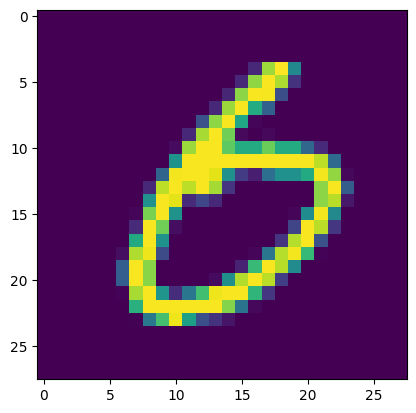

Predict: 0
Original: 6


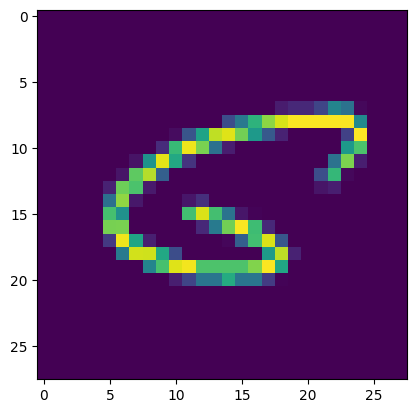

Predict: 5
Original: 6


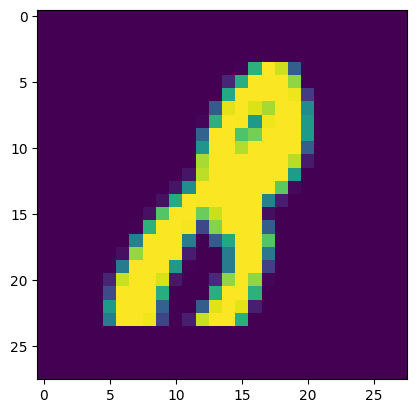

Predict: 0
Original: 8


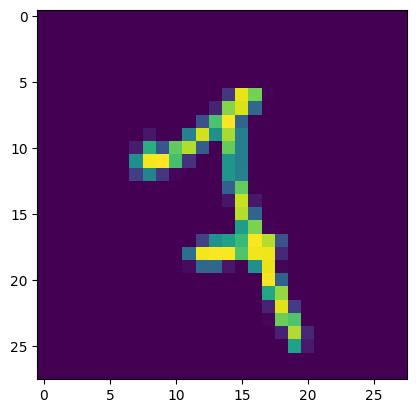

Predict: 1
Original: 7


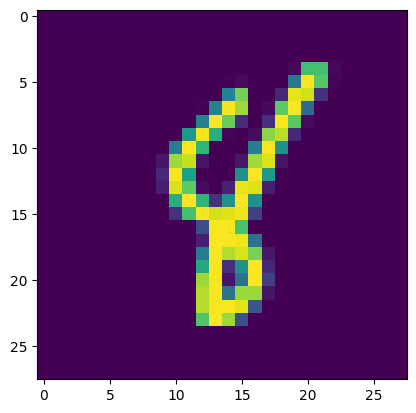

Predict: 4
Original: 8


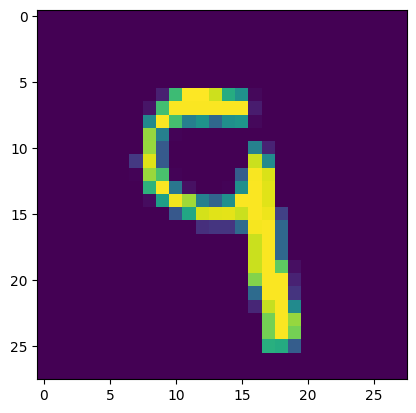

Predict: 7
Original: 9


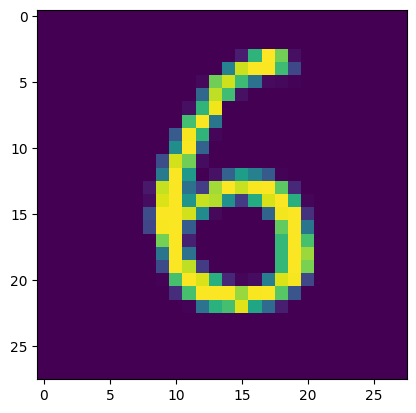

Predict: 5
Original: 6


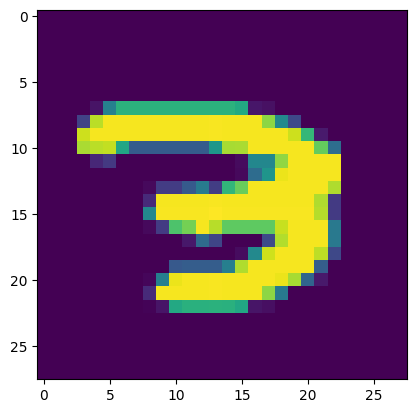

Predict: 7
Original: 3


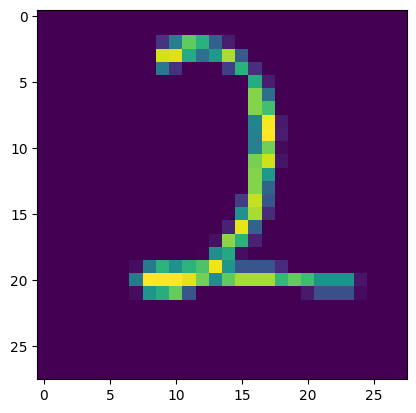

Predict: 1
Original: 2


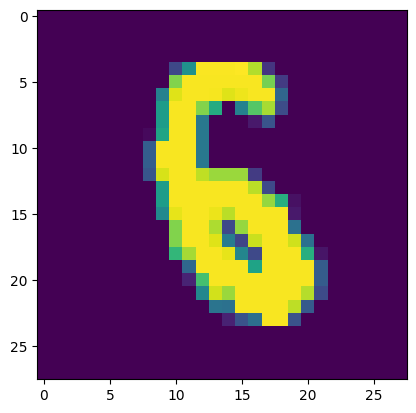

Predict: 5
Original: 6


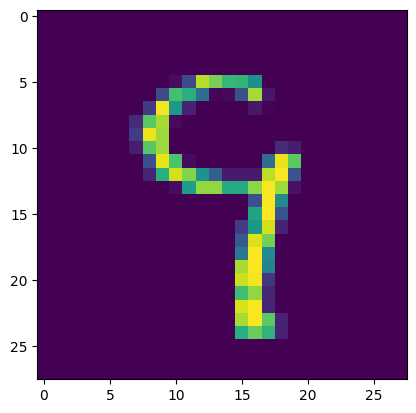

Predict: 7
Original: 9


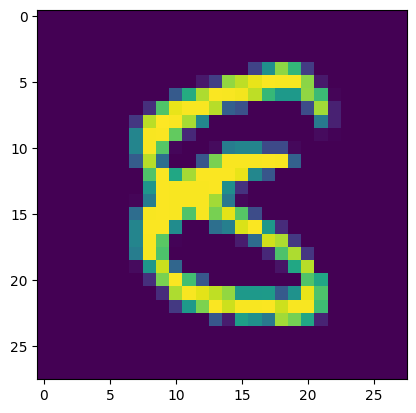

Predict: 5
Original: 8


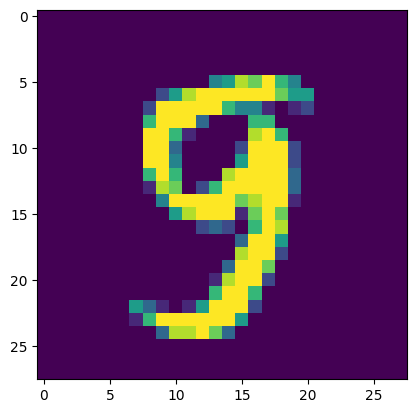

Predict: 3
Original: 9


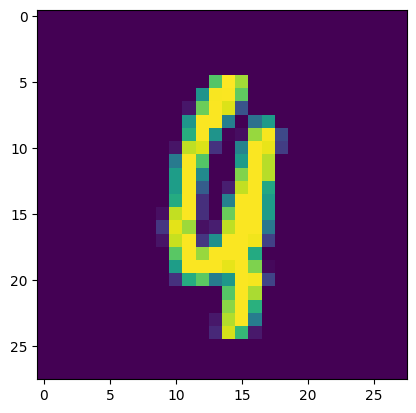

Predict: 4
Original: 9


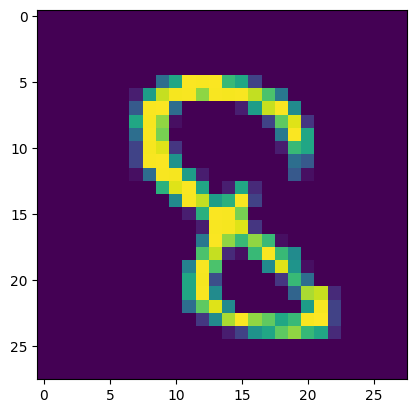

Predict: 2
Original: 8


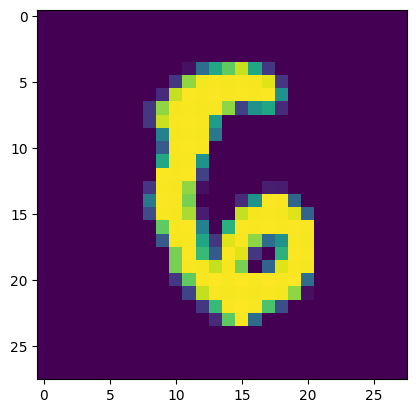

Predict: 5
Original: 6


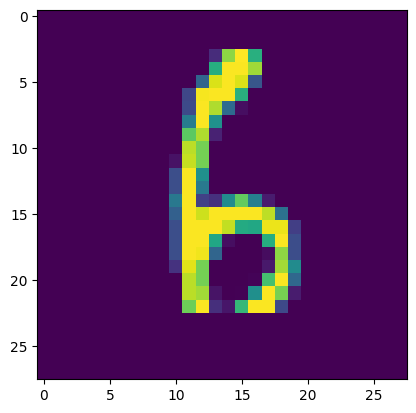

Predict: 5
Original: 6


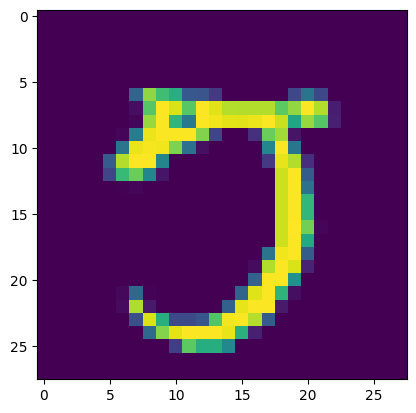

Predict: 7
Original: 5


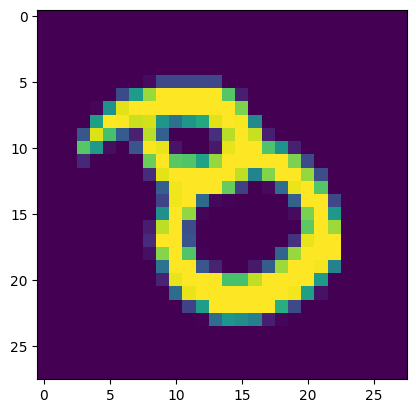

Predict: 0
Original: 8


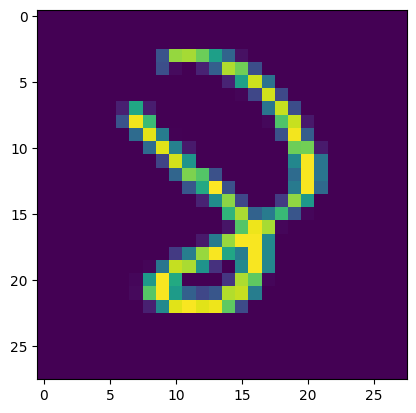

Predict: 2
Original: 8


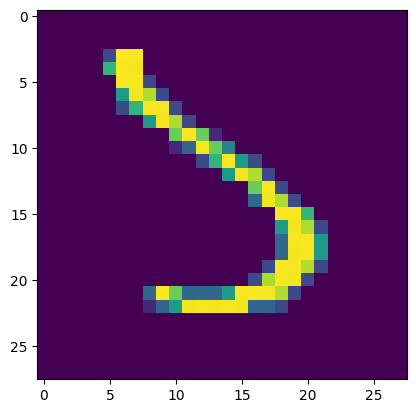

Predict: 3
Original: 5


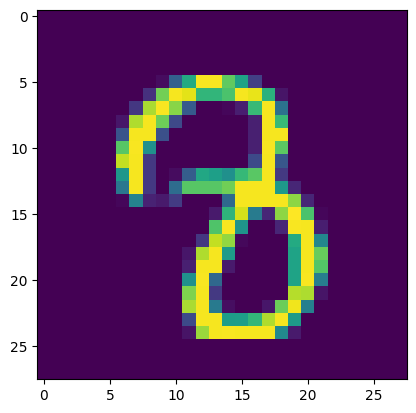

Predict: 3
Original: 8


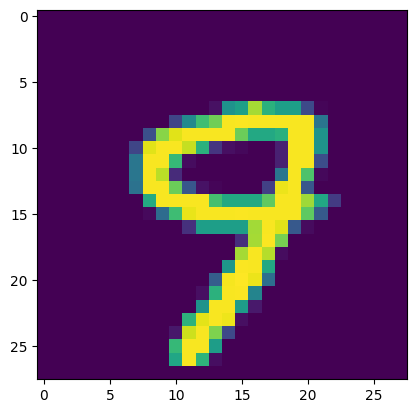

Predict: 7
Original: 9


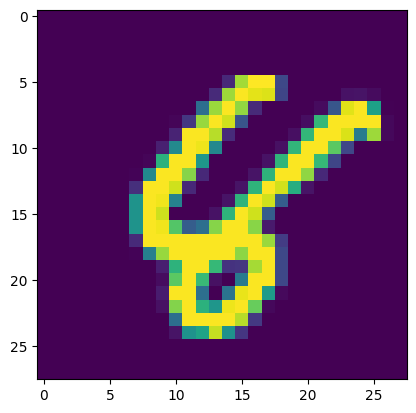

Predict: 6
Original: 8


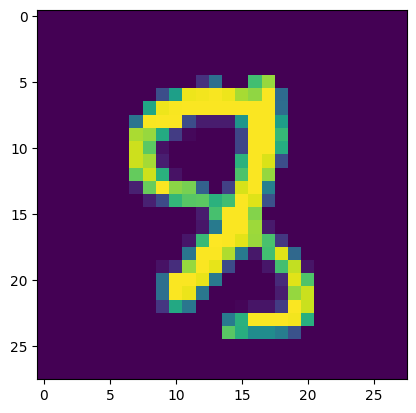

Predict: 2
Original: 8


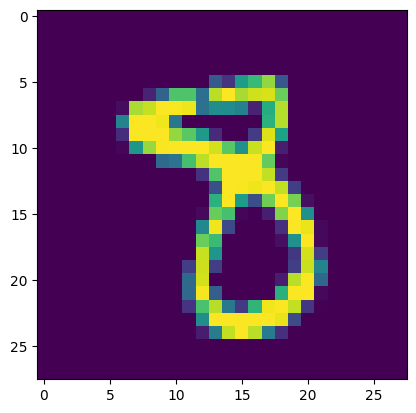

Predict: 3
Original: 8


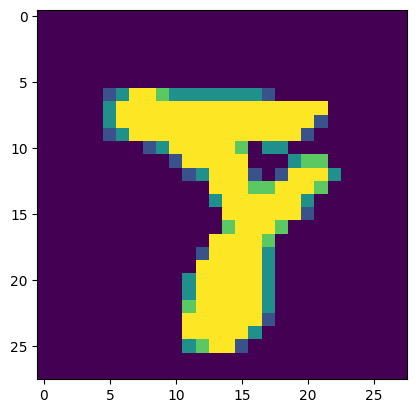

Predict: 7
Original: 8


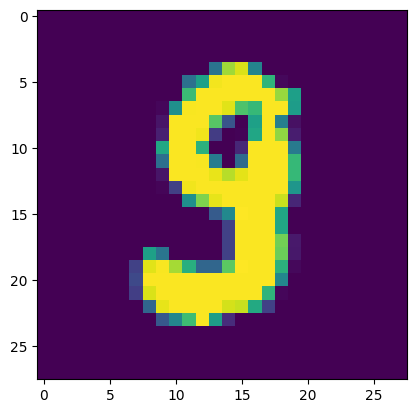

Predict: 3
Original: 9


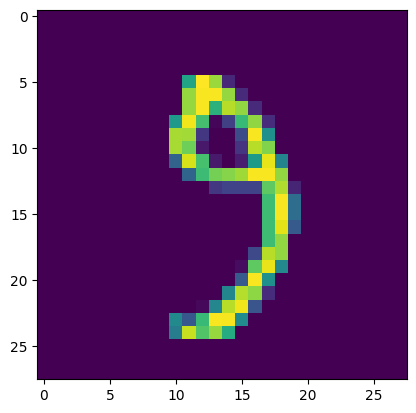

Predict: 5
Original: 9


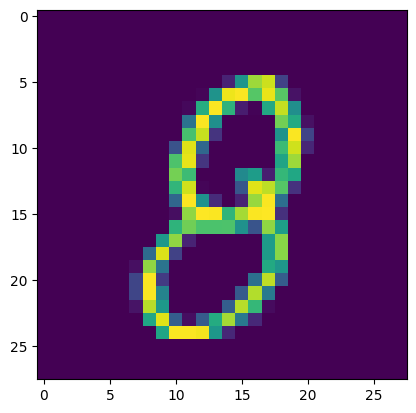

Predict: 3
Original: 8


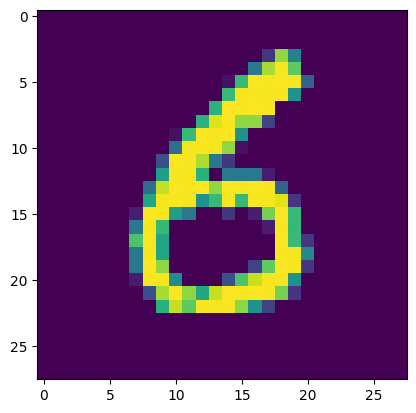

Predict: 5
Original: 6


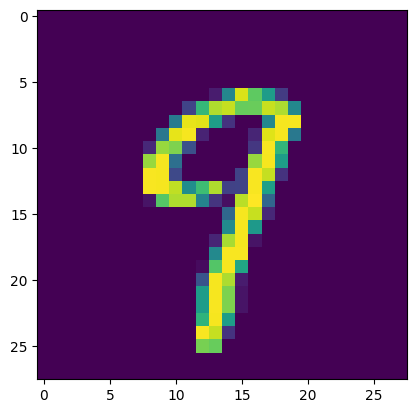

Predict: 7
Original: 9


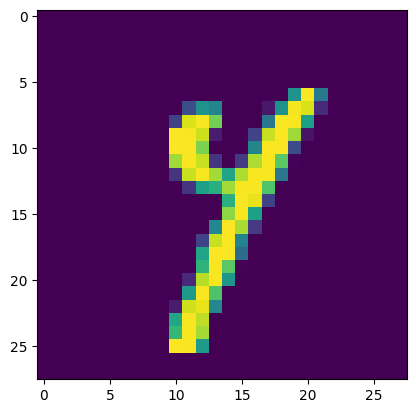

Predict: 7
Original: 4


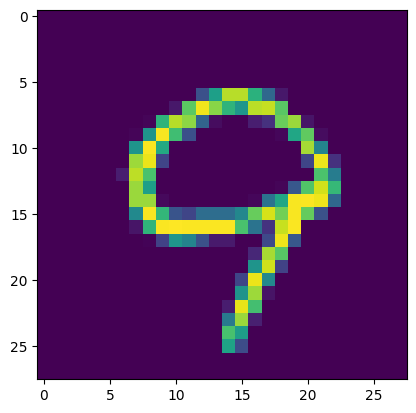

Predict: 7
Original: 9


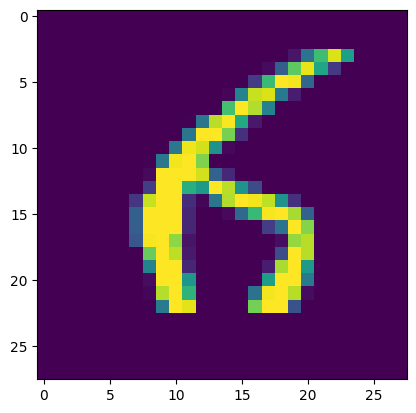

Predict: 5
Original: 6


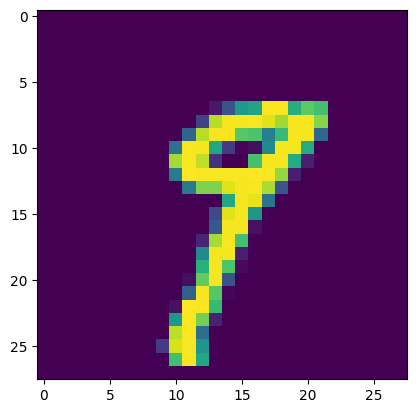

Predict: 7
Original: 9


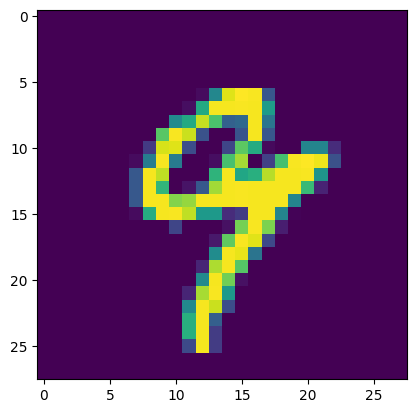

Predict: 4
Original: 9


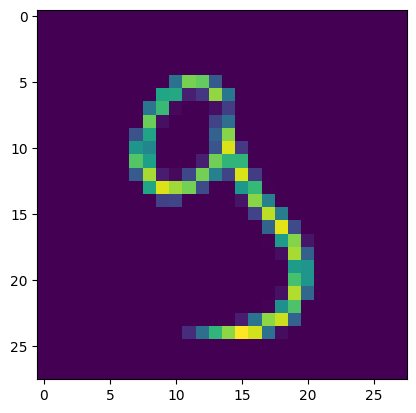

Predict: 3
Original: 9


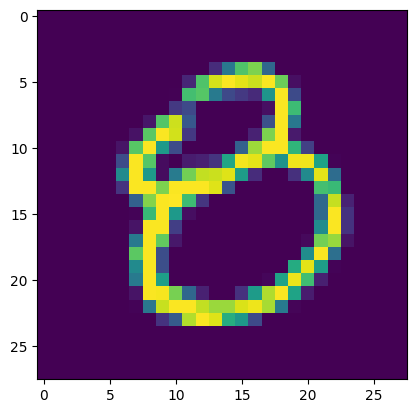

Predict: 3
Original: 8


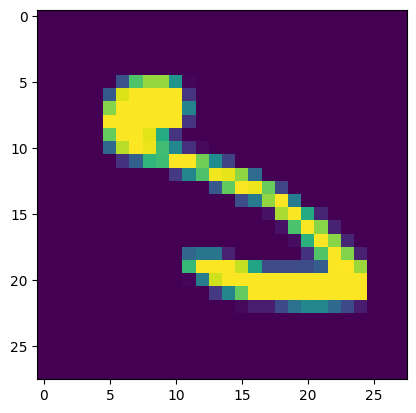

Predict: 3
Original: 5


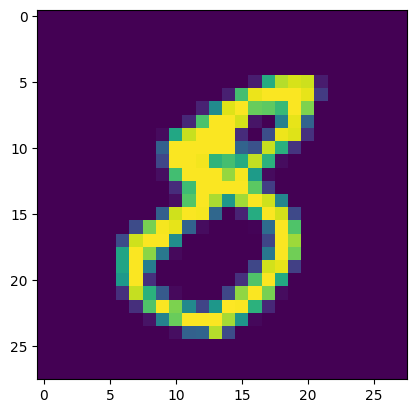

Predict: 3
Original: 8


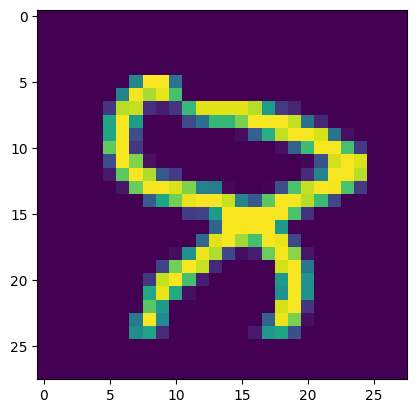

Predict: 9
Original: 8


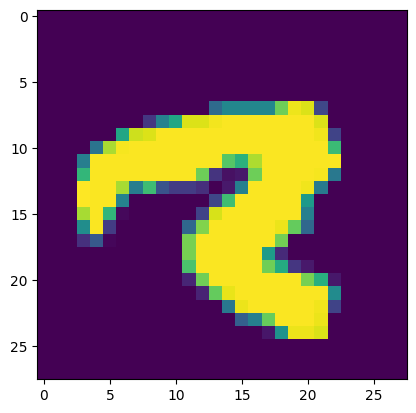

Predict: 7
Original: 2


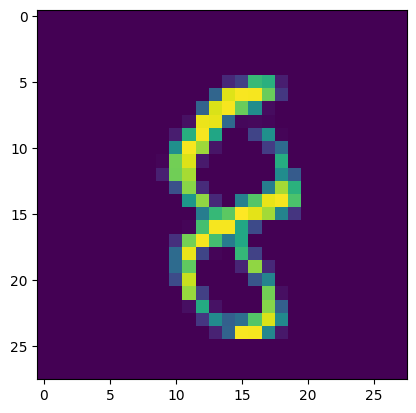

Predict: 3
Original: 8


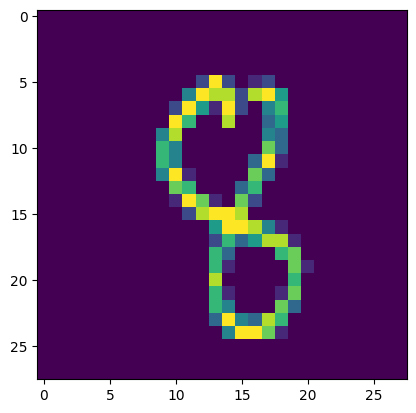

Predict: 3
Original: 8


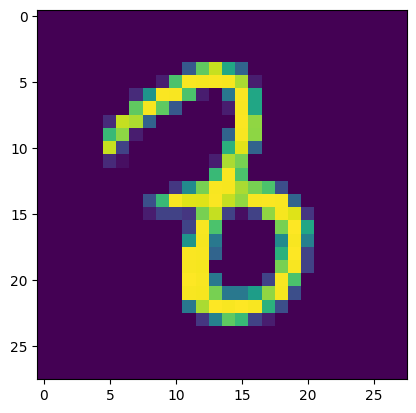

Predict: 3
Original: 8


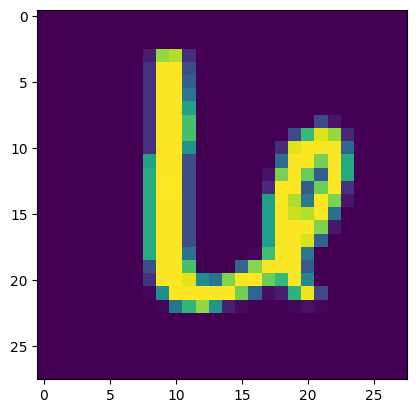

Predict: 4
Original: 6


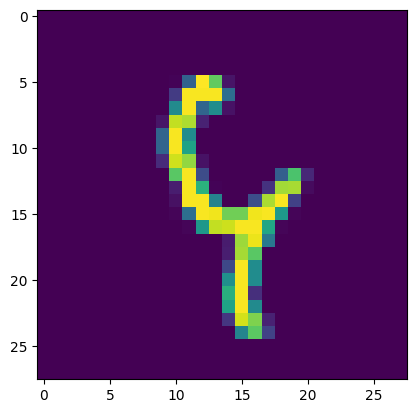

Predict: 4
Original: 9


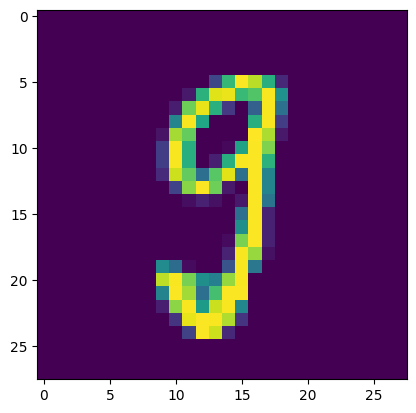

Predict: 3
Original: 9


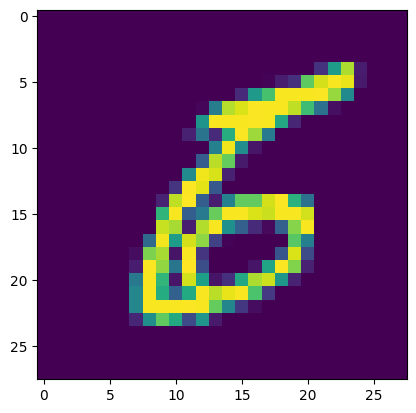

Predict: 5
Original: 6


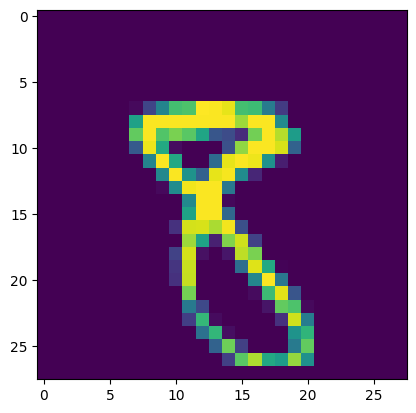

Predict: 3
Original: 8


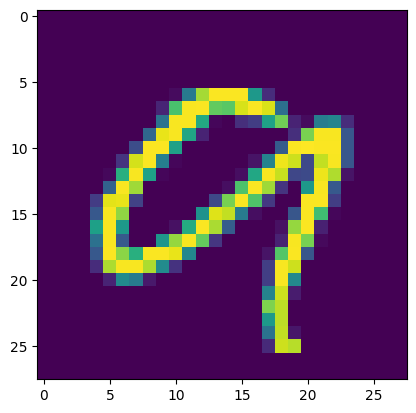

Predict: 7
Original: 9


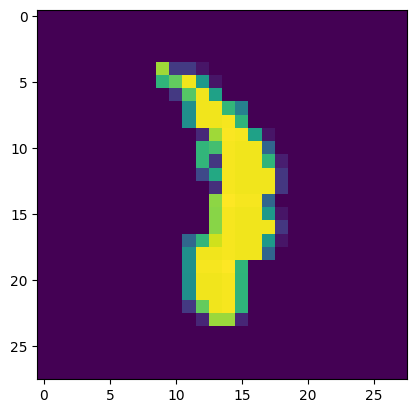

Predict: 7
Original: 1


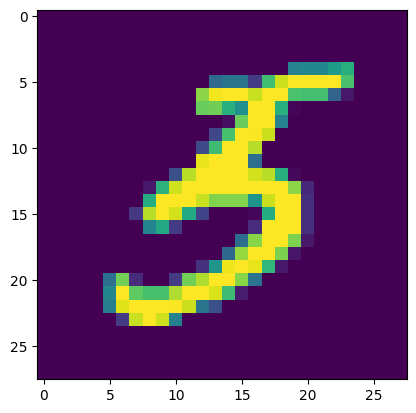

Predict: 3
Original: 5


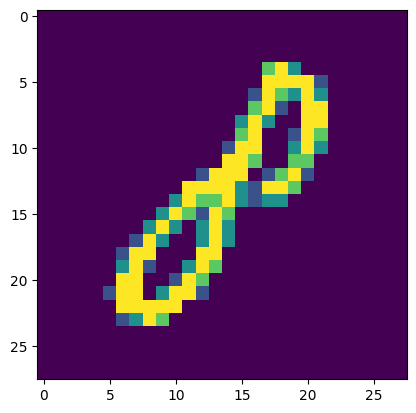

Predict: 0
Original: 8


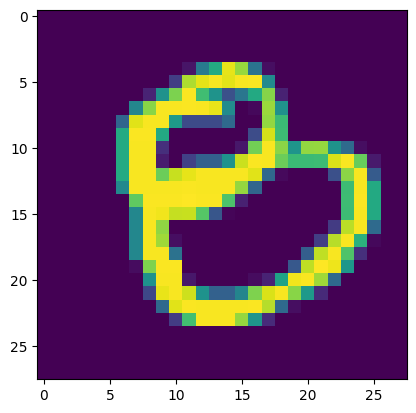

Predict: 0
Original: 8


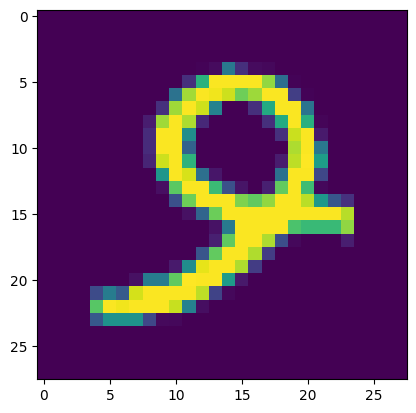

Predict: 2
Original: 9


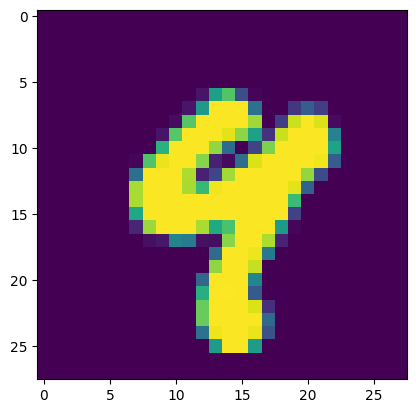

Predict: 9
Original: 4


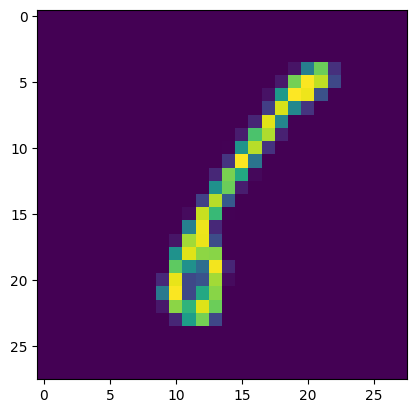

Predict: 1
Original: 6


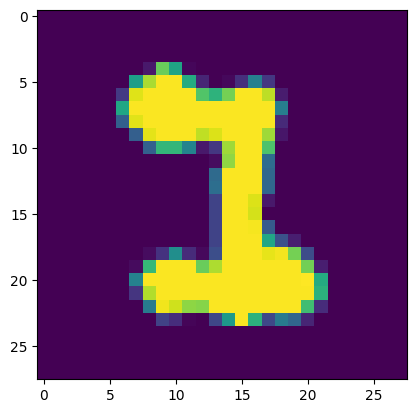

Predict: 2
Original: 1


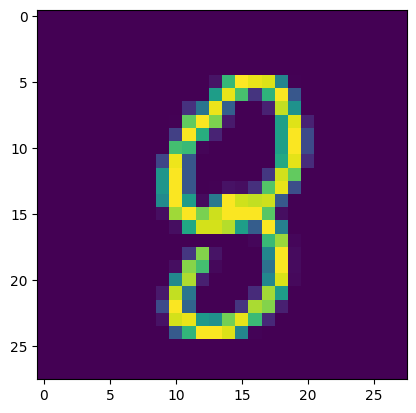

Predict: 3
Original: 8


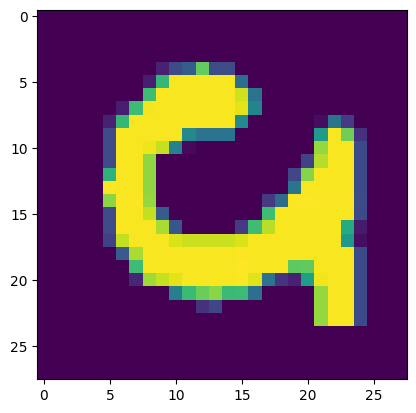

Predict: 4
Original: 9


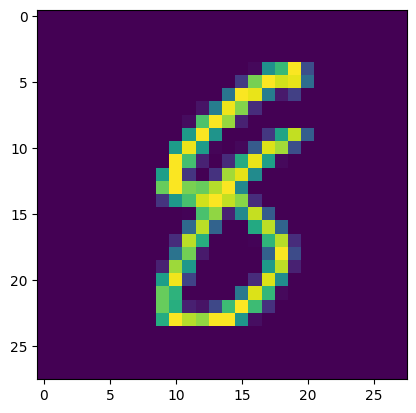

Predict: 5
Original: 8


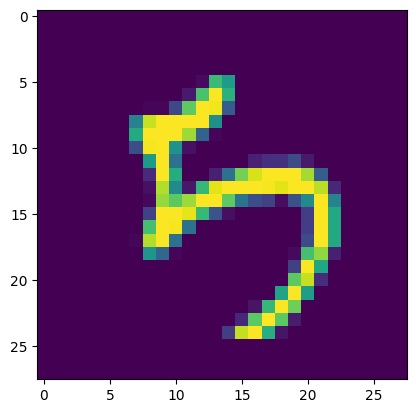

Predict: 7
Original: 5


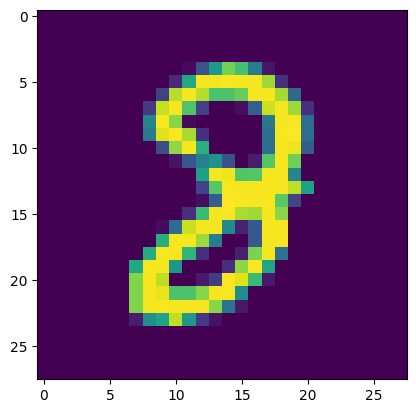

Predict: 2
Original: 8


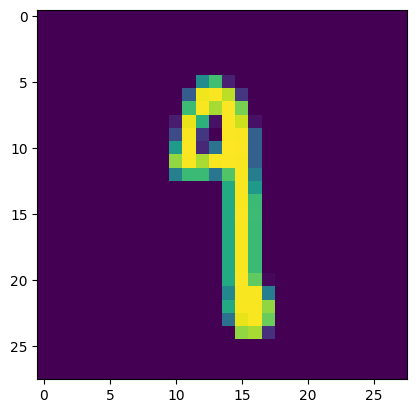

Predict: 1
Original: 9


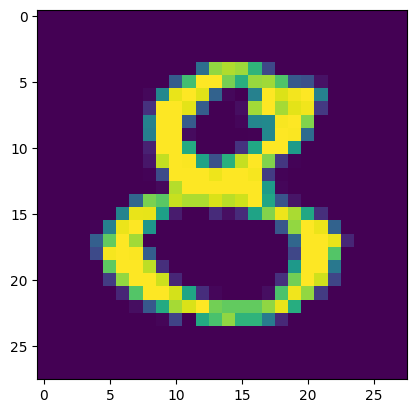

Predict: 3
Original: 8


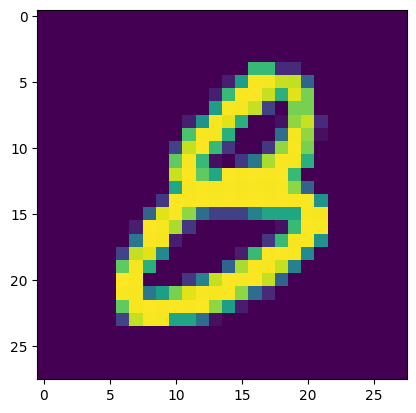

Predict: 3
Original: 8


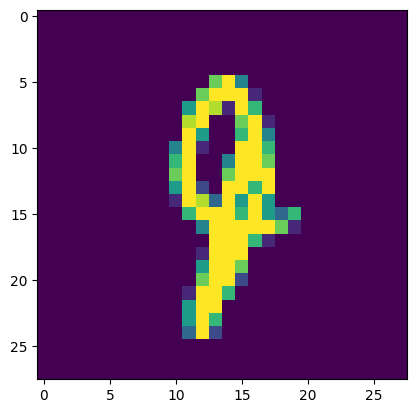

Predict: 4
Original: 9


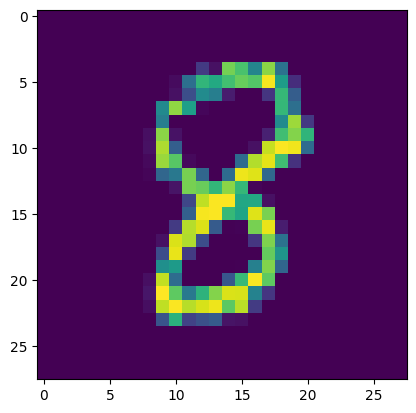

Predict: 3
Original: 8


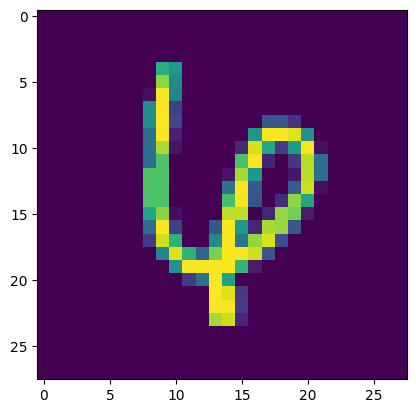

Predict: 4
Original: 6


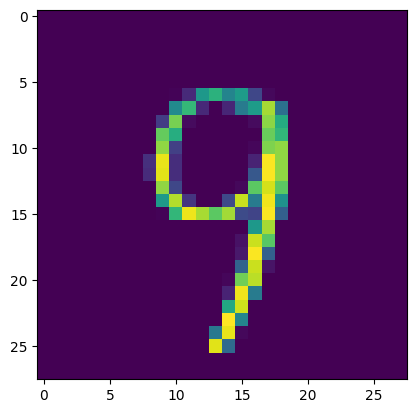

Predict: 7
Original: 9


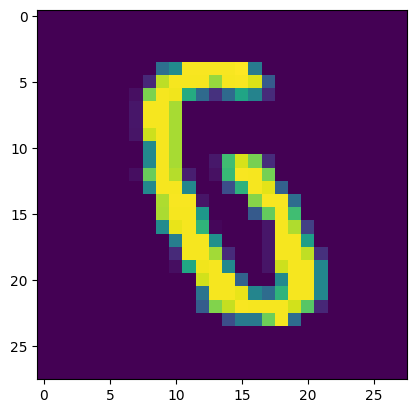

Predict: 5
Original: 6


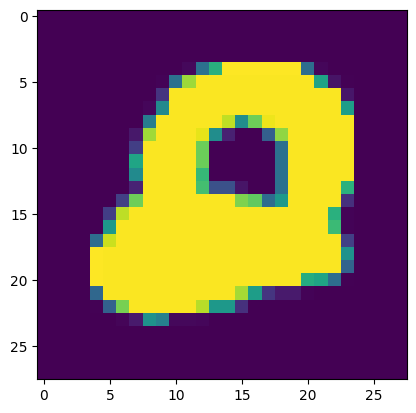

Predict: 0
Original: 2


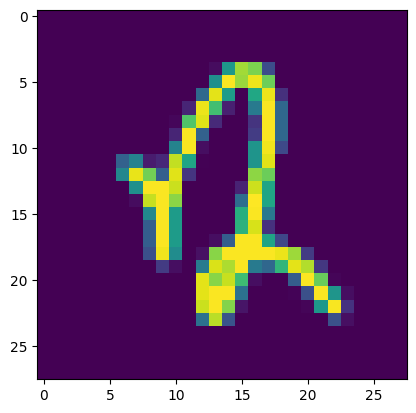

Predict: 4
Original: 2


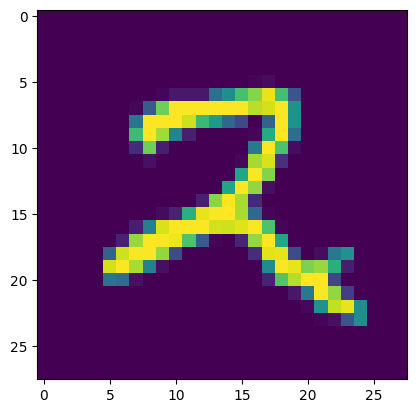

Predict: 7
Original: 2


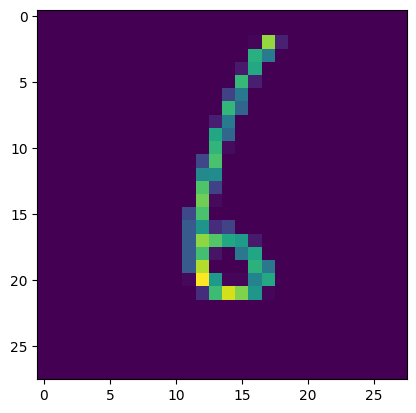

Predict: 1
Original: 6


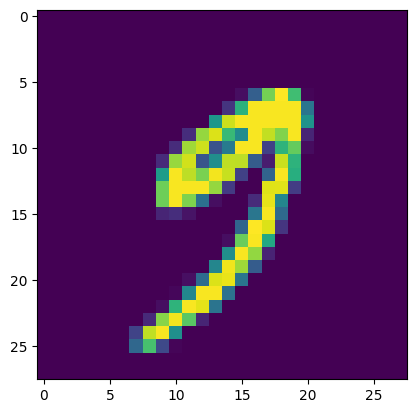

Predict: 7
Original: 9


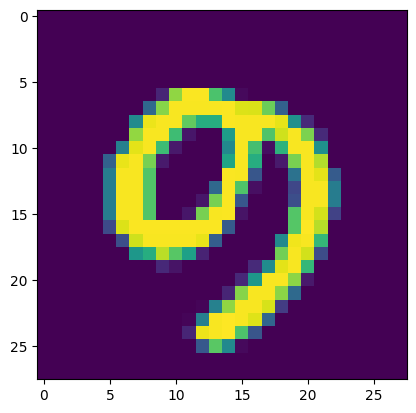

Predict: 0
Original: 9


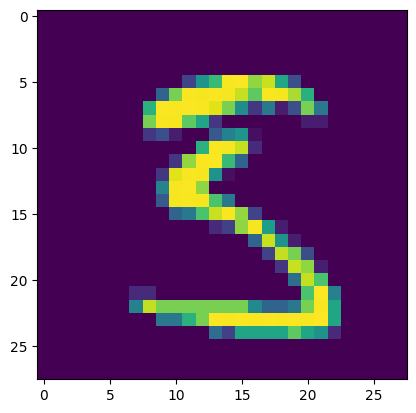

Predict: 3
Original: 5


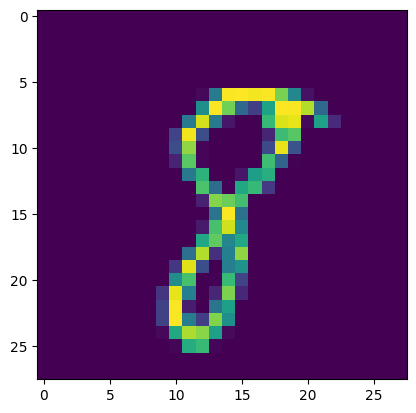

Predict: 3
Original: 8


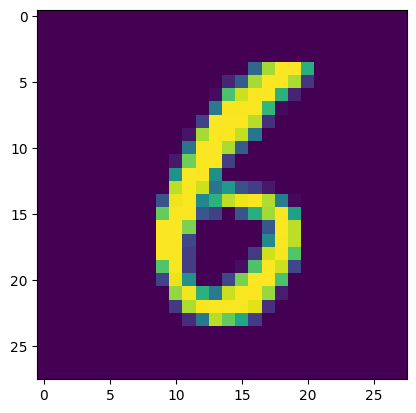

Predict: 5
Original: 6


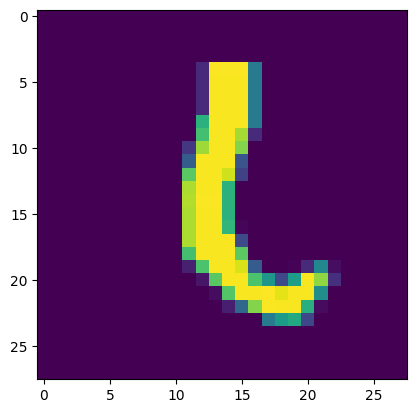

Predict: 1
Original: 6


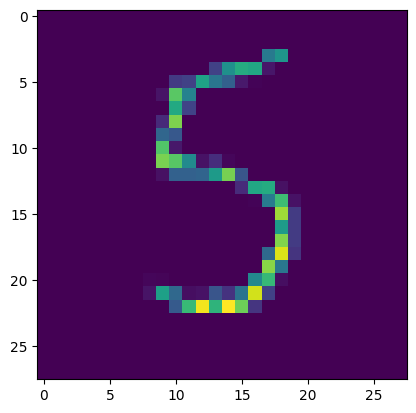

Predict: 3
Original: 5


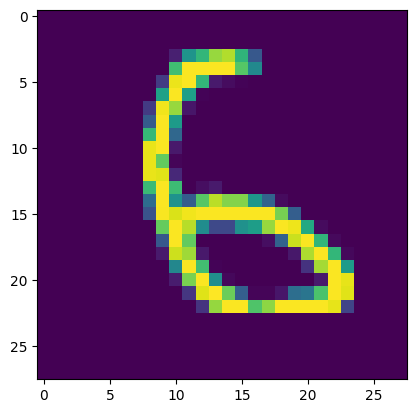

Predict: 5
Original: 6


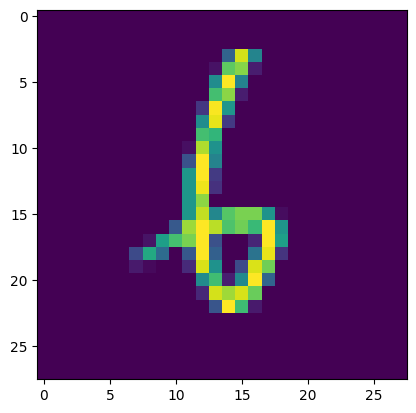

Predict: 5
Original: 6


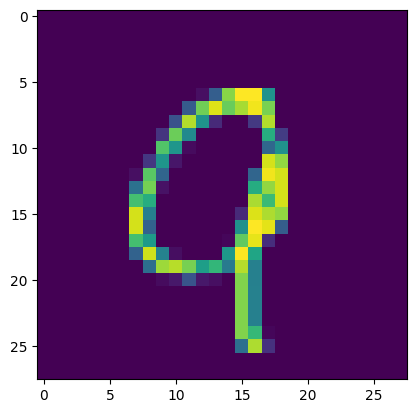

Predict: 7
Original: 9


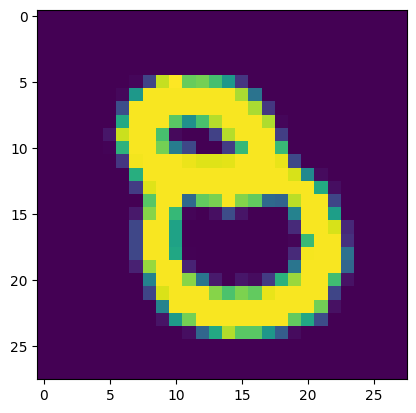

Predict: 0
Original: 8


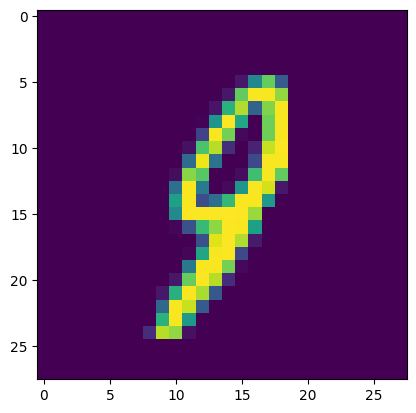

Predict: 4
Original: 9


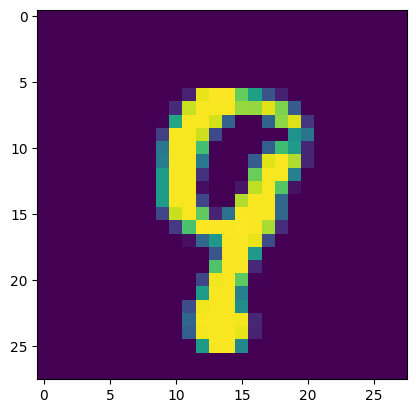

Predict: 7
Original: 9


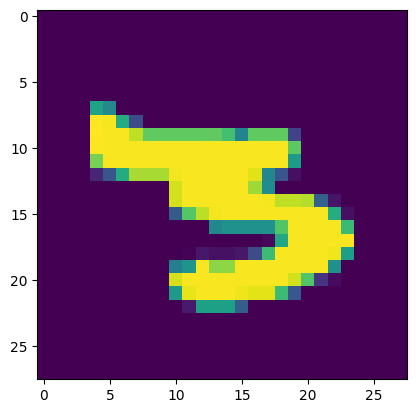

Predict: 7
Original: 3


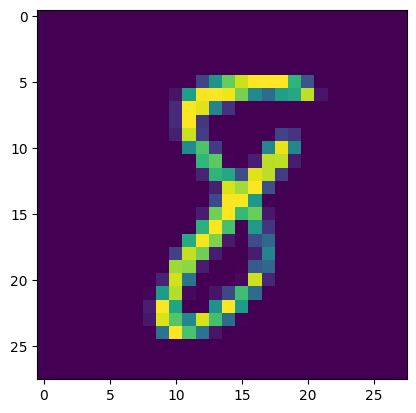

Predict: 3
Original: 8


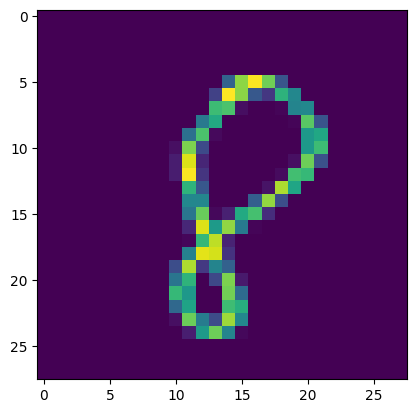

Predict: 3
Original: 8


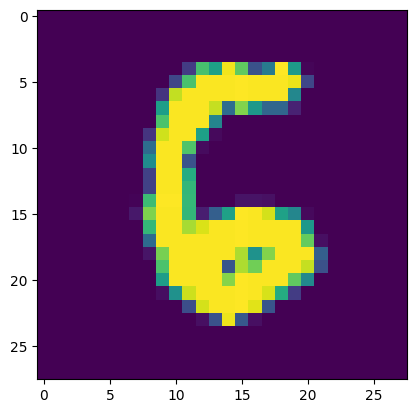

Predict: 5
Original: 6


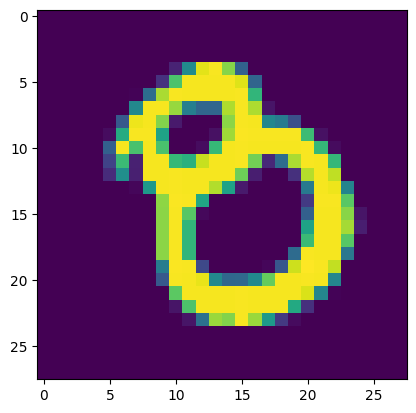

Predict: 0
Original: 8


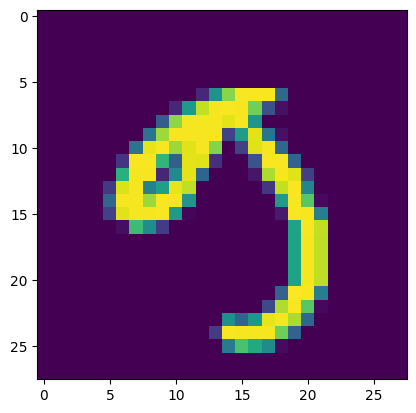

Predict: 5
Original: 9


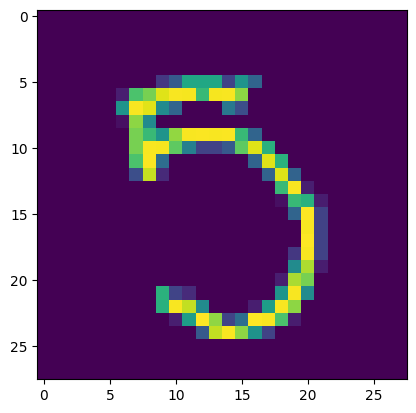

Predict: 3
Original: 5


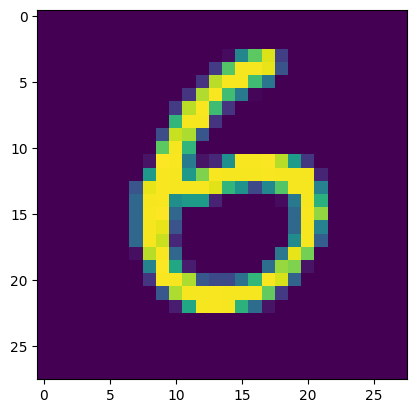

Predict: 5
Original: 6


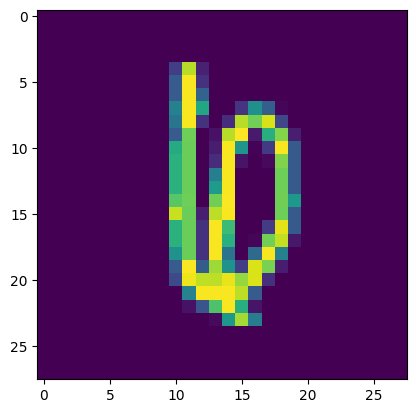

Predict: 0
Original: 6


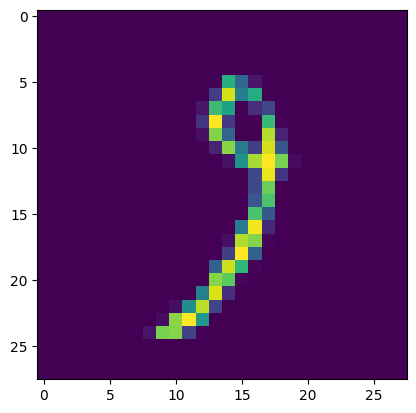

Predict: 3
Original: 9


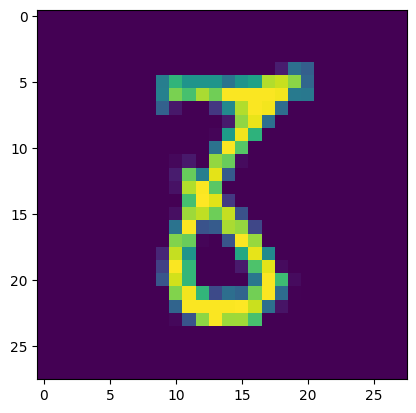

Predict: 3
Original: 8


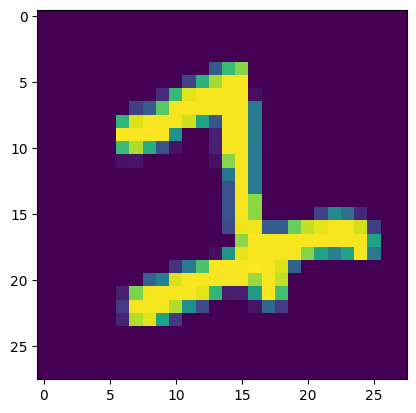

Predict: 2
Original: 1


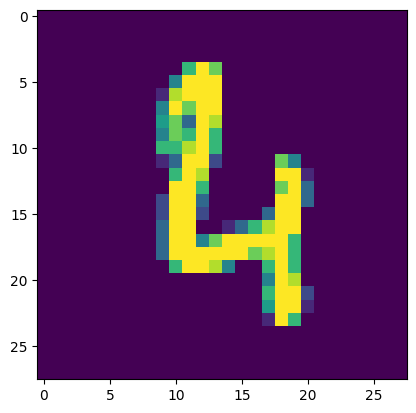

Predict: 1
Original: 4


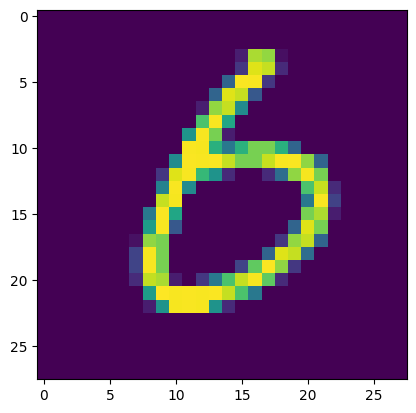

Predict: 0
Original: 6


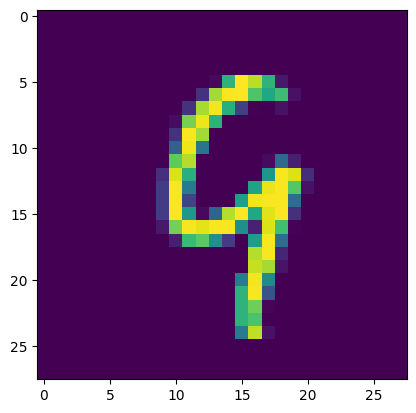

Predict: 5
Original: 9


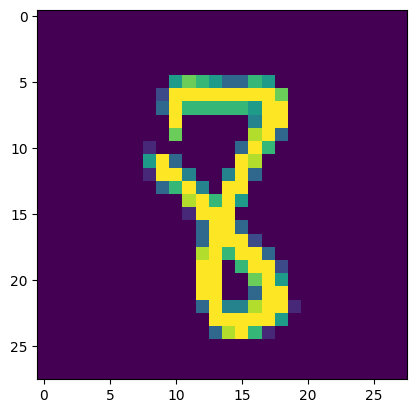

Predict: 3
Original: 8


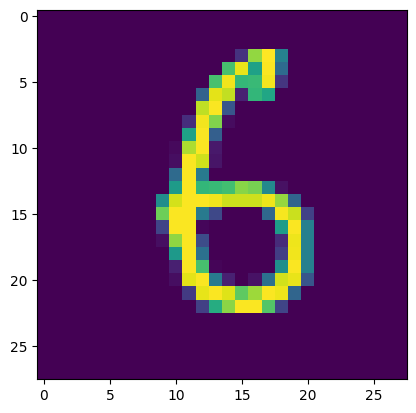

Predict: 5
Original: 6


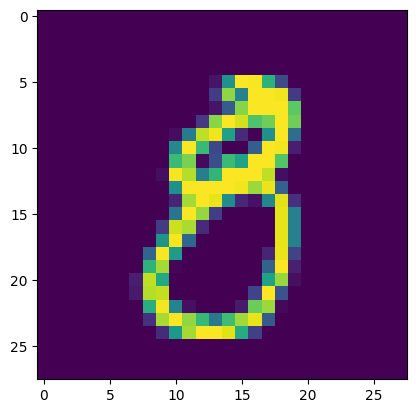

Predict: 3
Original: 8


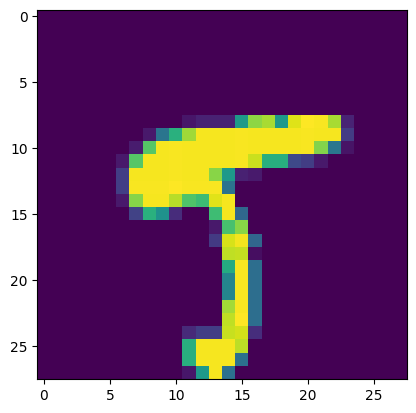

Predict: 7
Original: 5


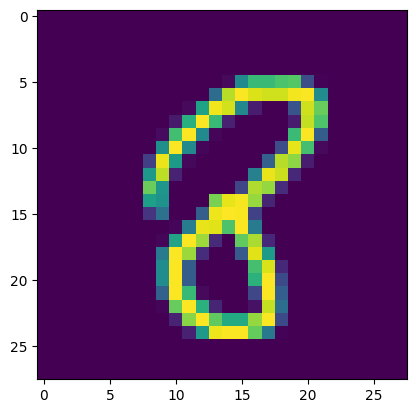

Predict: 3
Original: 8


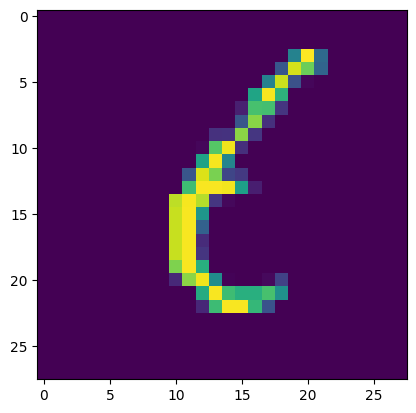

Predict: 1
Original: 6


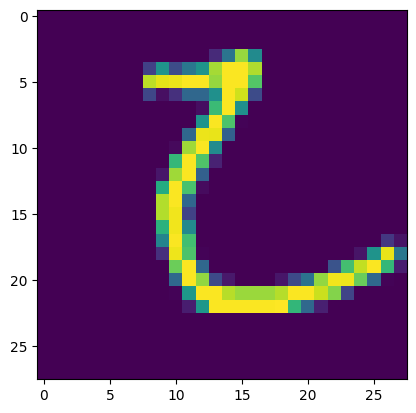

Predict: 1
Original: 2


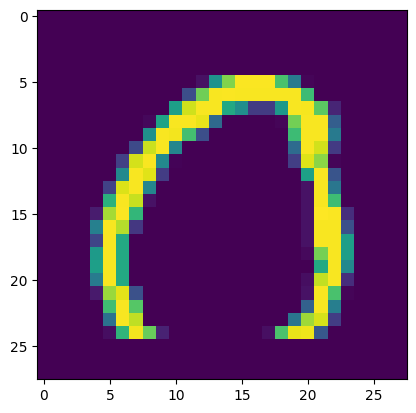

Predict: 7
Original: 0


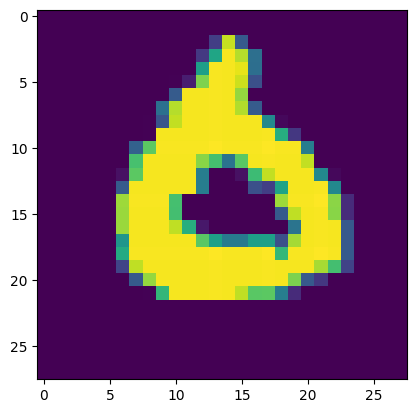

Predict: 0
Original: 6


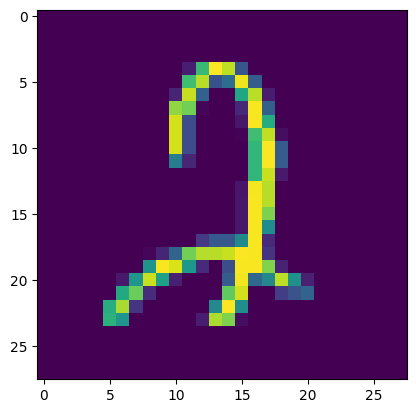

Predict: 7
Original: 2


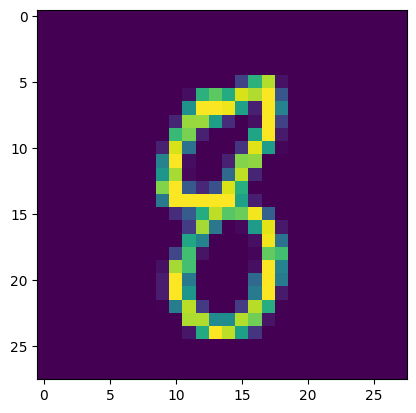

Predict: 3
Original: 8


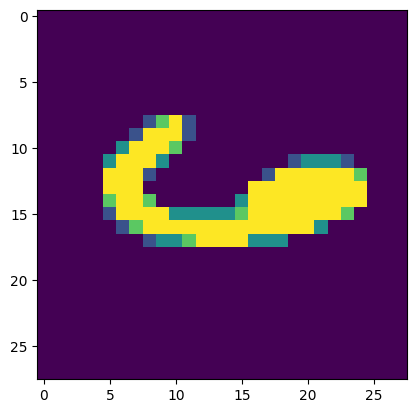

Predict: 4
Original: 6


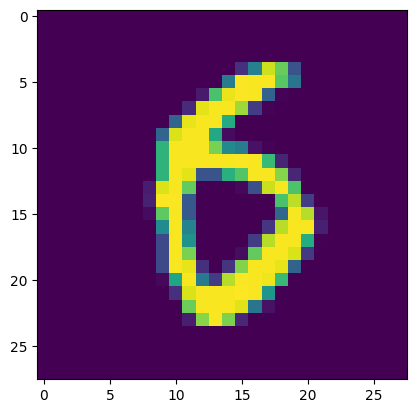

Predict: 5
Original: 6


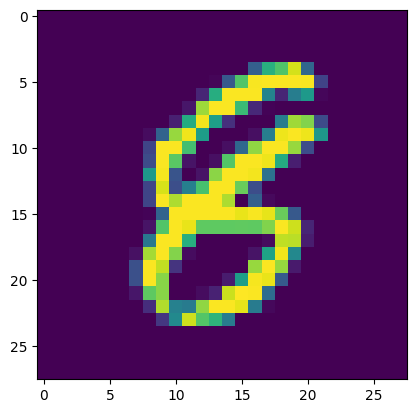

Predict: 3
Original: 8


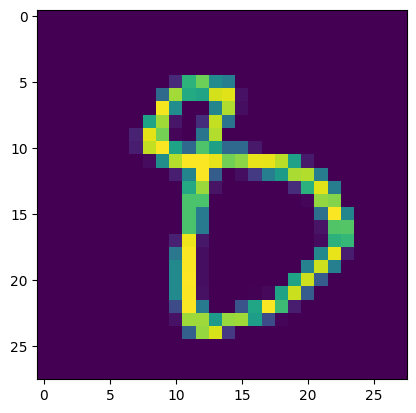

Predict: 5
Original: 8


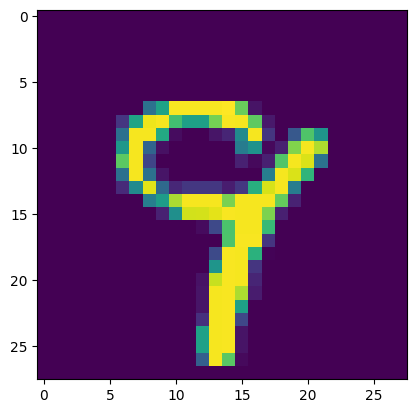

Predict: 7
Original: 9


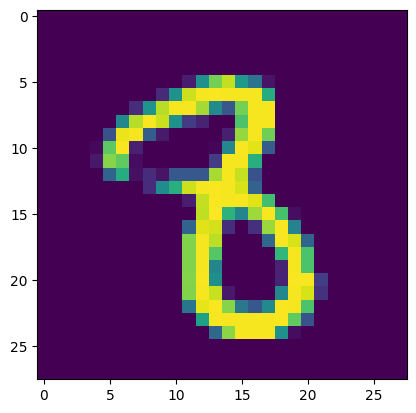

Predict: 3
Original: 8


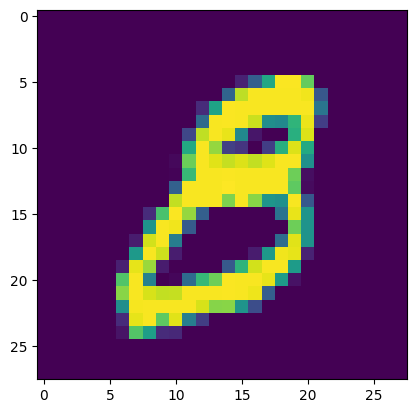

Predict: 0
Original: 8


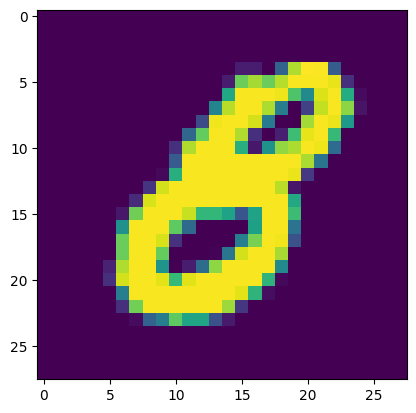

Predict: 0
Original: 8


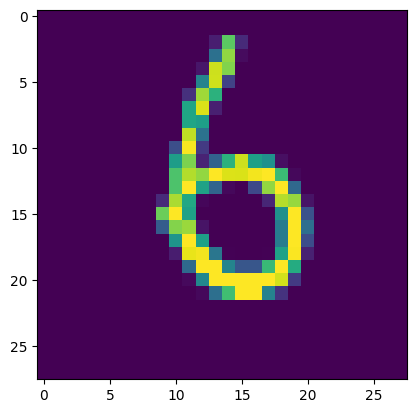

Predict: 5
Original: 6


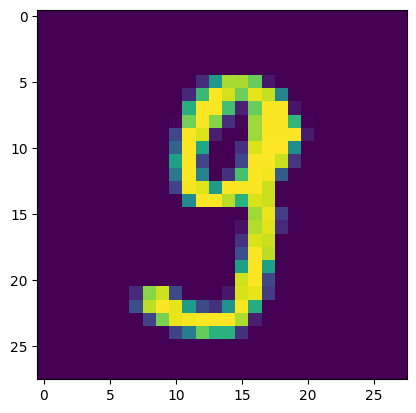

Predict: 3
Original: 9


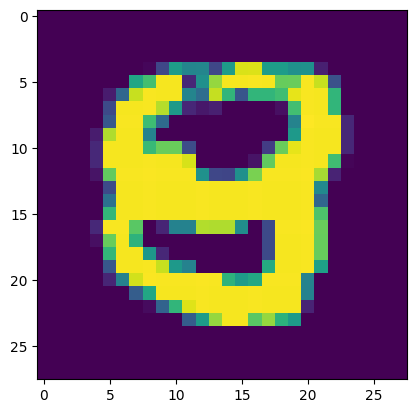

Predict: 9
Original: 8


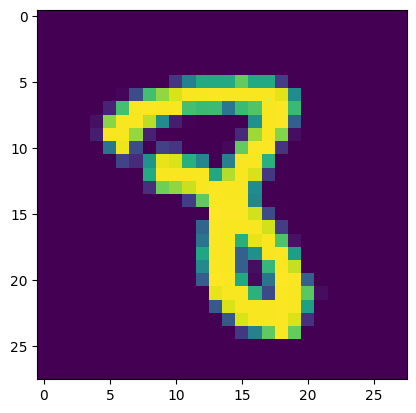

Predict: 3
Original: 8


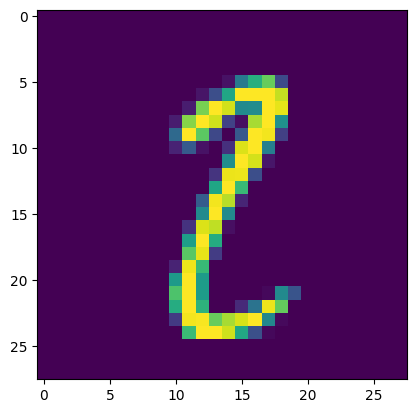

Predict: 1
Original: 2


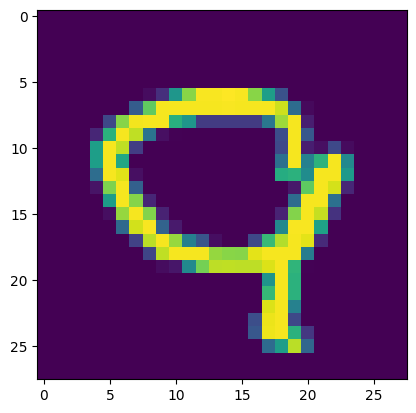

Predict: 7
Original: 9


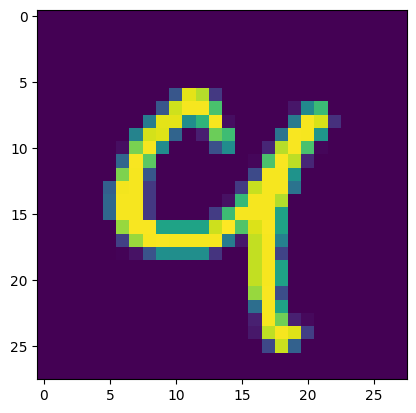

Predict: 4
Original: 9


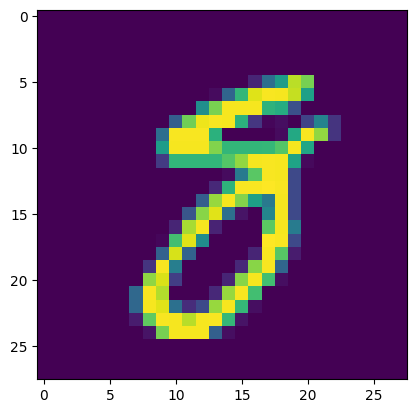

Predict: 3
Original: 8


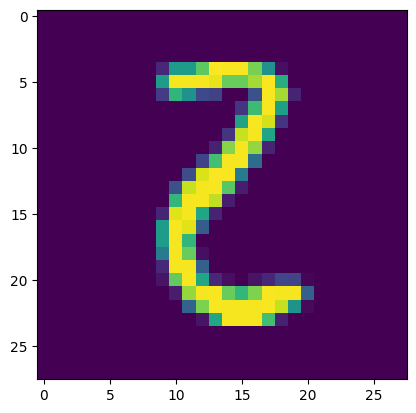

Predict: 3
Original: 2


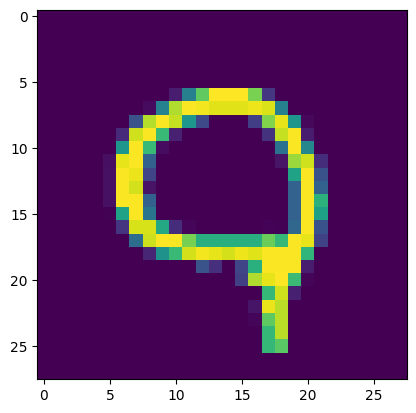

Predict: 7
Original: 9


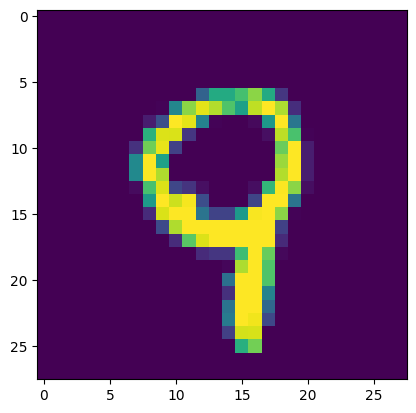

Predict: 7
Original: 9


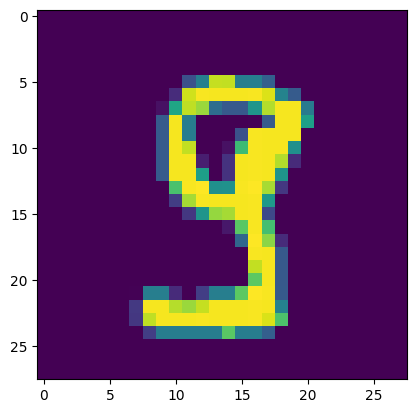

Predict: 3
Original: 9


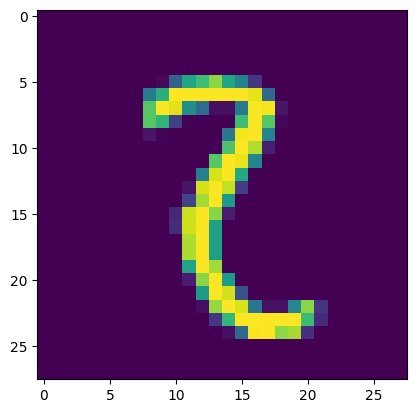

Predict: 3
Original: 2


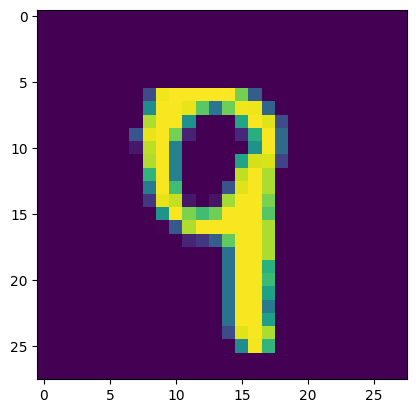

Predict: 7
Original: 9


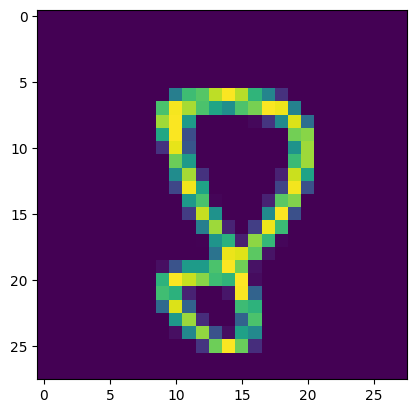

Predict: 7
Original: 8


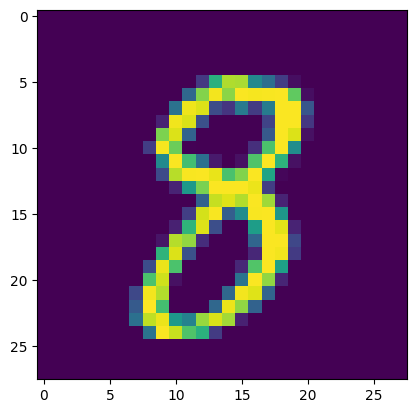

Predict: 3
Original: 8


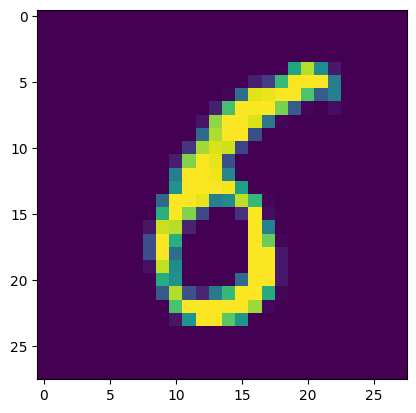

Predict: 5
Original: 6


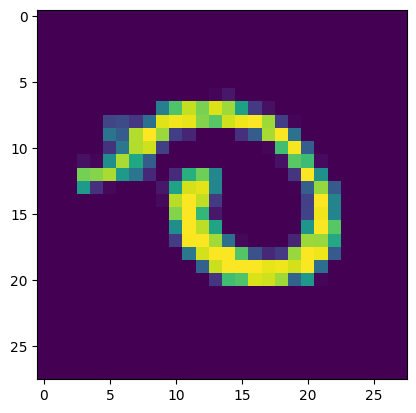

Predict: 3
Original: 0


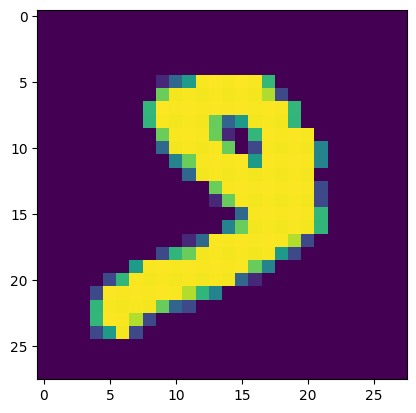

Predict: 2
Original: 9


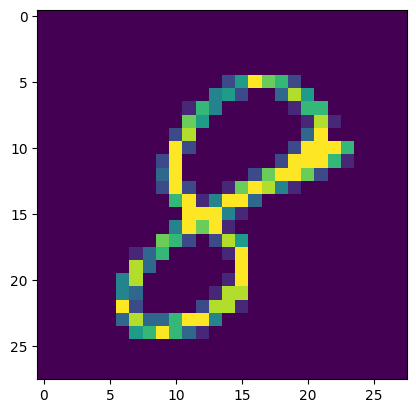

Predict: 3
Original: 8


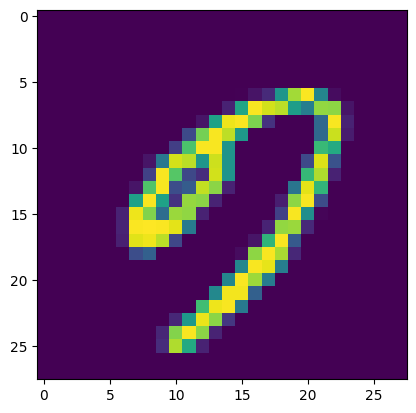

Predict: 7
Original: 9


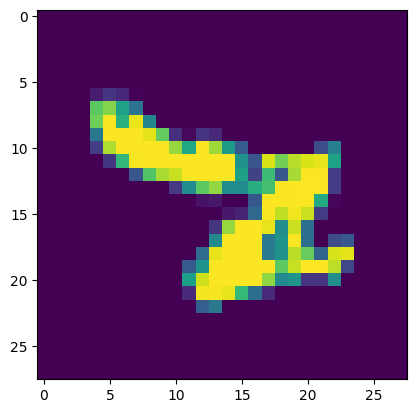

Predict: 7
Original: 2


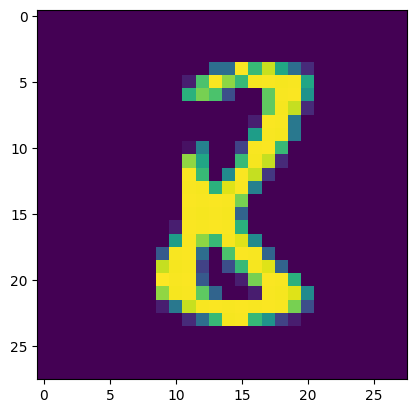

Predict: 2
Original: 8


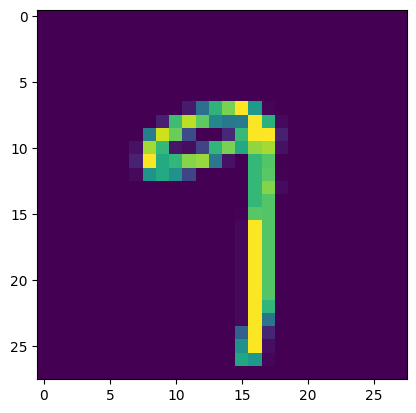

Predict: 7
Original: 9


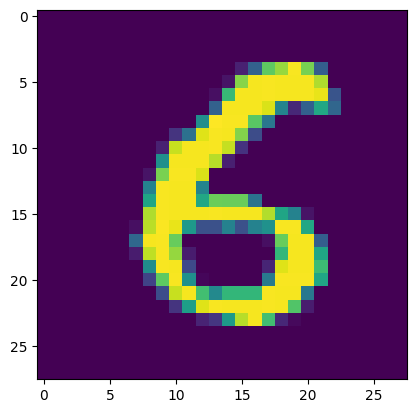

Predict: 5
Original: 6


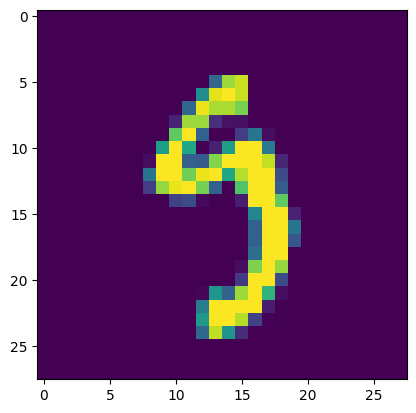

Predict: 5
Original: 9


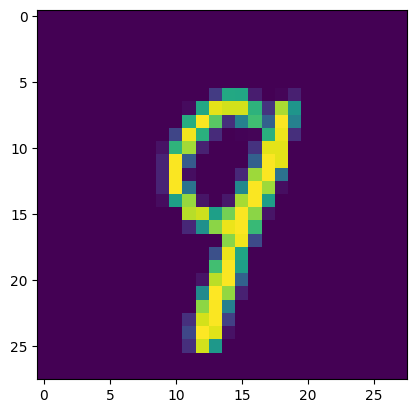

Predict: 7
Original: 9


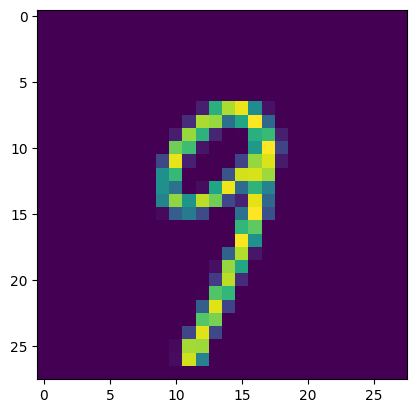

Predict: 3
Original: 9


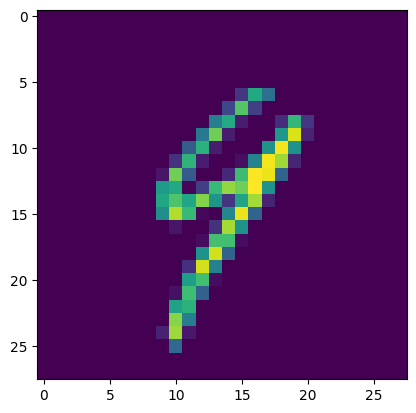

Predict: 7
Original: 9


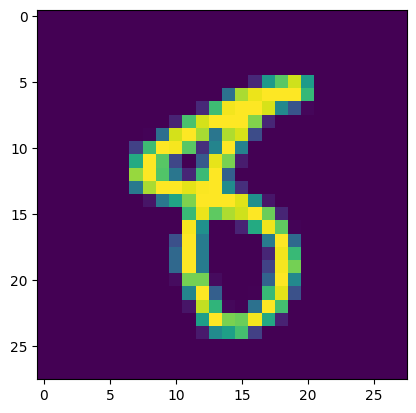

Predict: 5
Original: 8


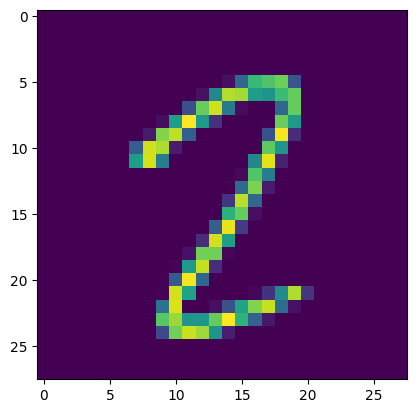

Predict: 3
Original: 2


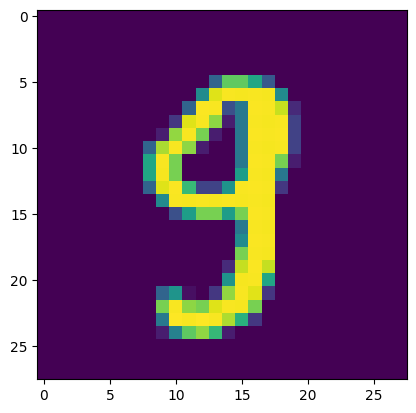

Predict: 3
Original: 9


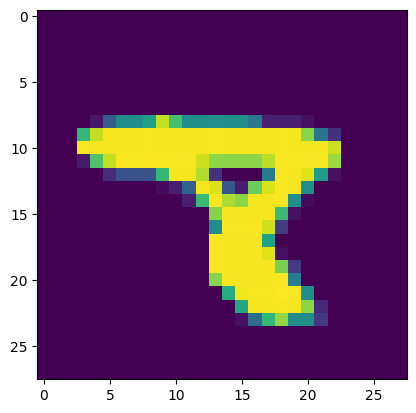

Predict: 7
Original: 8


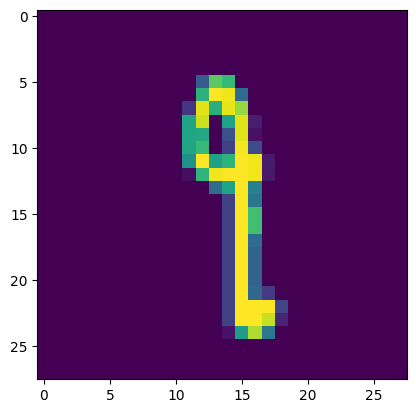

Predict: 1
Original: 9


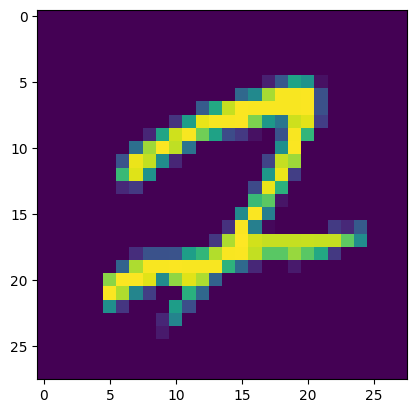

Predict: 7
Original: 2


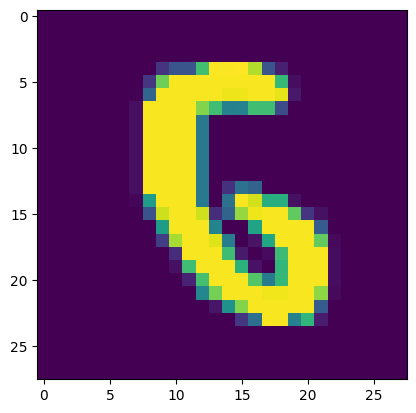

Predict: 5
Original: 6


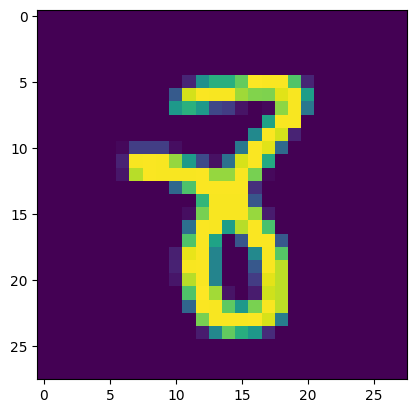

Predict: 3
Original: 8


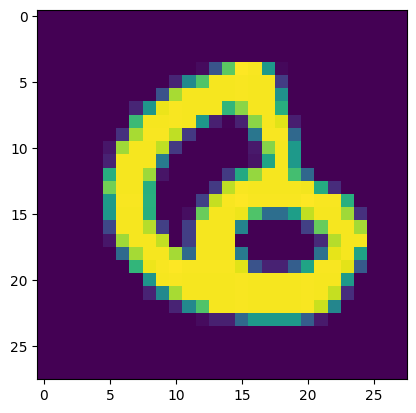

Predict: 0
Original: 6


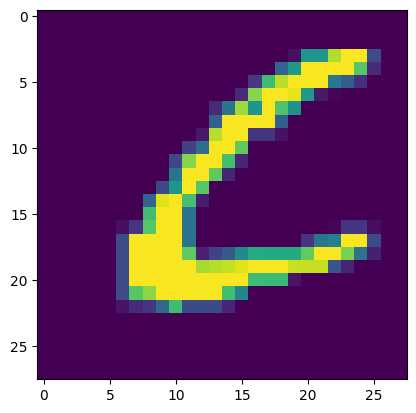

Predict: 0
Original: 6


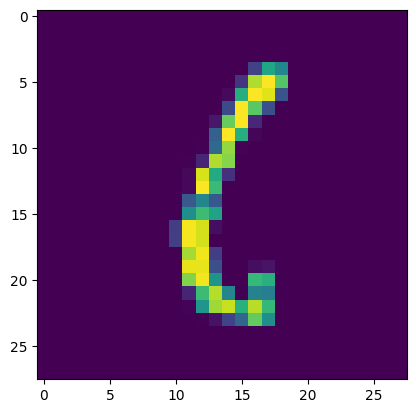

Predict: 1
Original: 6


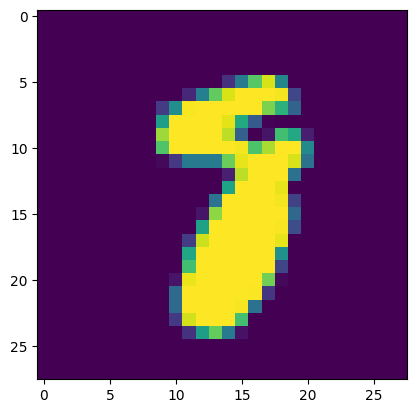

Predict: 3
Original: 8


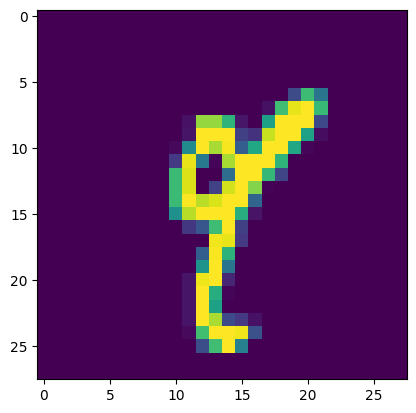

Predict: 4
Original: 9


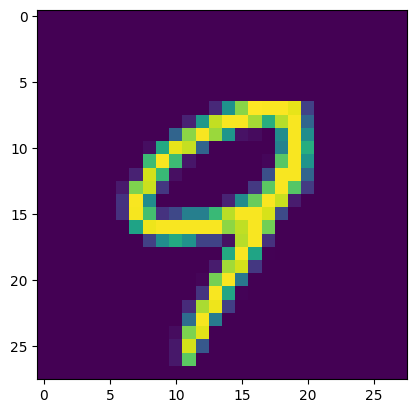

Predict: 7
Original: 9


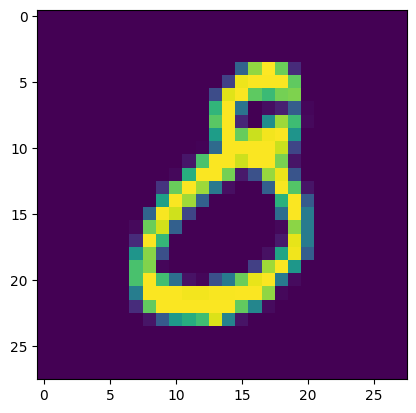

Predict: 0
Original: 8


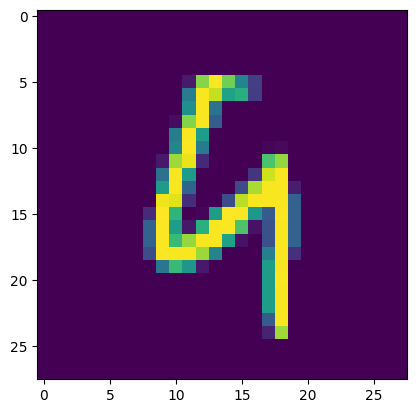

Predict: 4
Original: 9


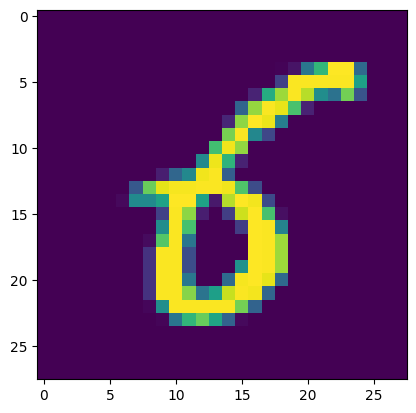

Predict: 5
Original: 6


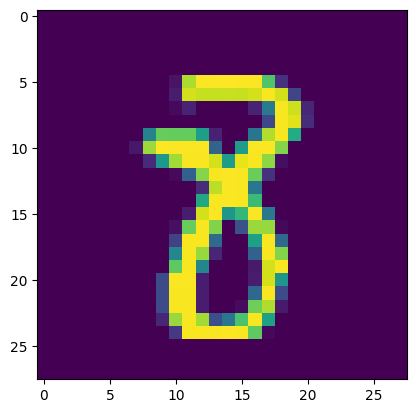

Predict: 3
Original: 8


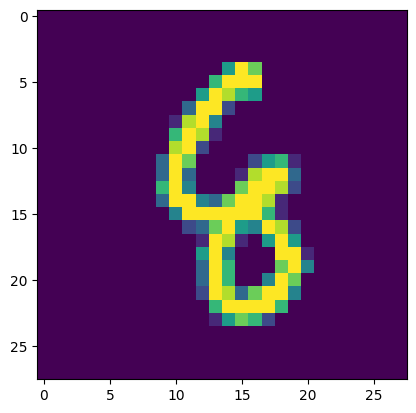

Predict: 6
Original: 8


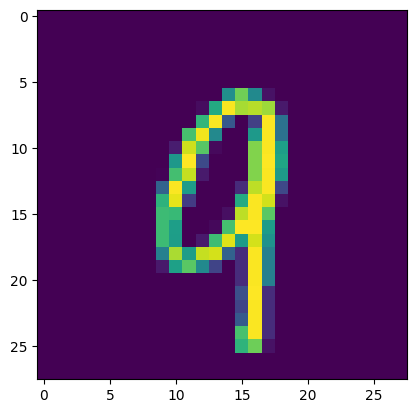

Predict: 7
Original: 9


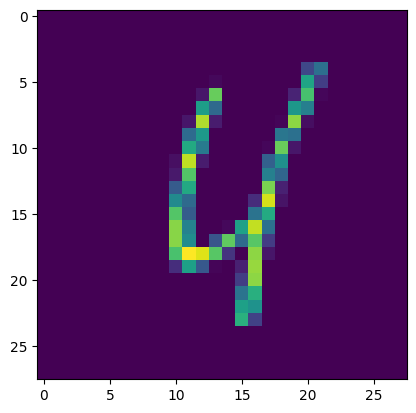

Predict: 1
Original: 4


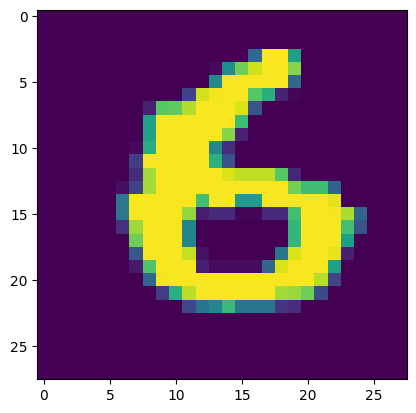

Predict: 5
Original: 6


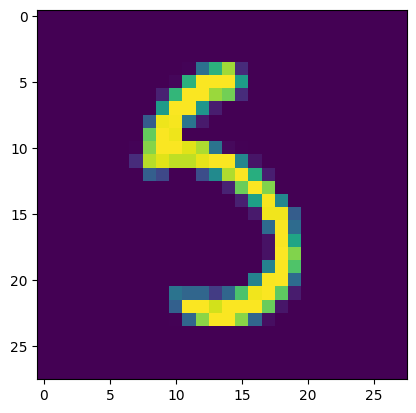

Predict: 3
Original: 5


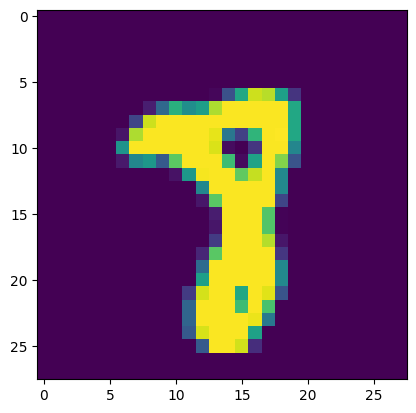

Predict: 7
Original: 8


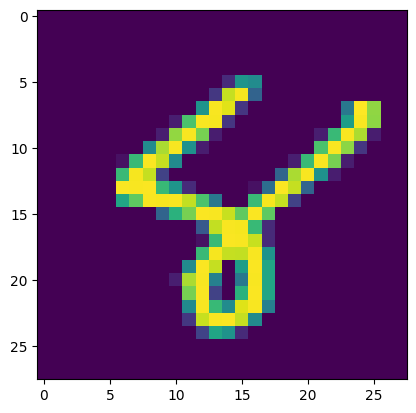

Predict: 4
Original: 8


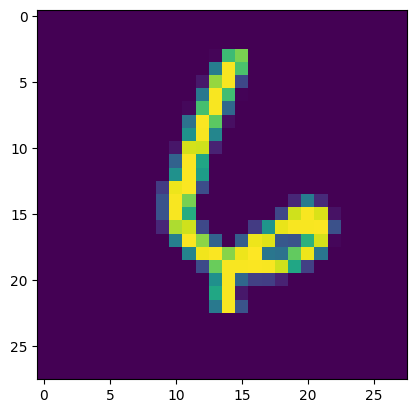

Predict: 1
Original: 6


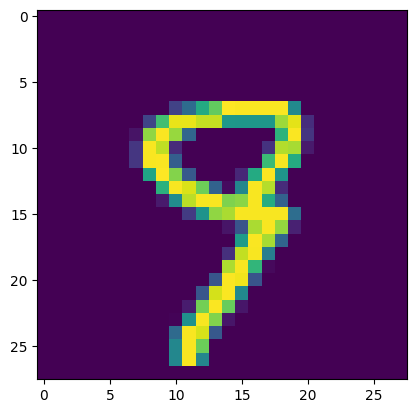

Predict: 7
Original: 9


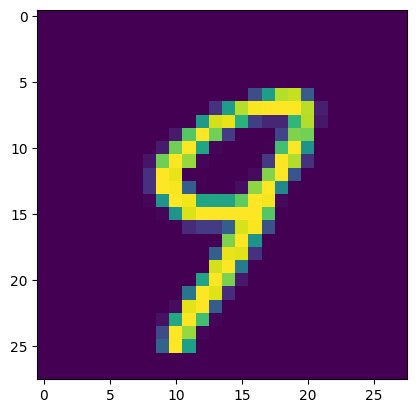

Predict: 7
Original: 9


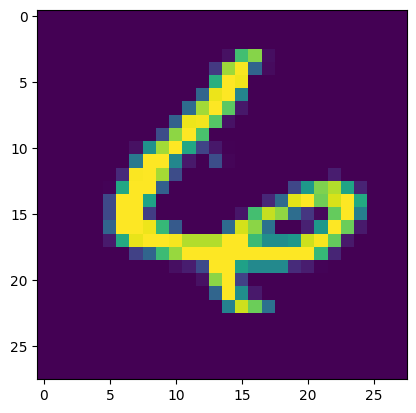

Predict: 4
Original: 6


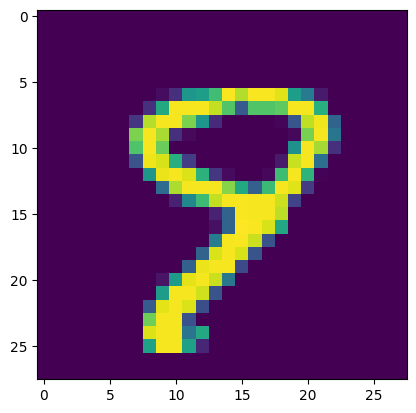

Predict: 3
Original: 9


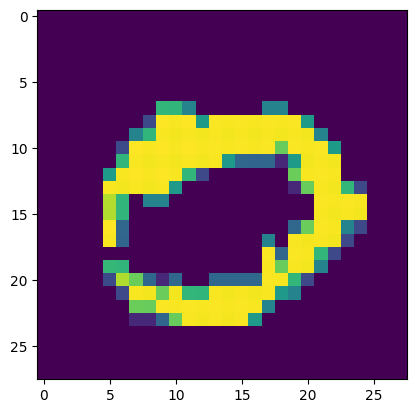

Predict: 7
Original: 0


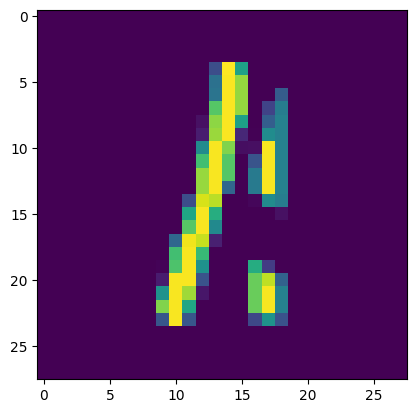

Predict: 4
Original: 1


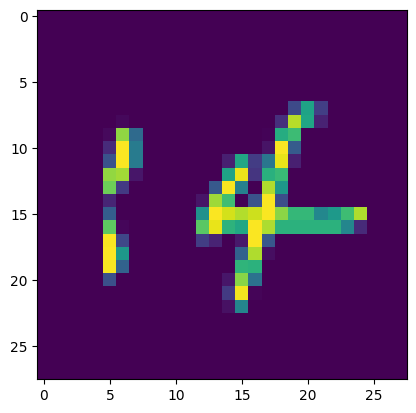

Predict: 7
Original: 4


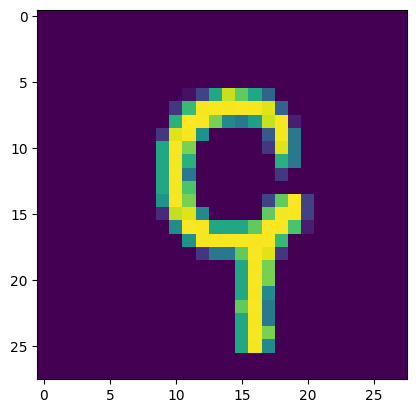

Predict: 7
Original: 9


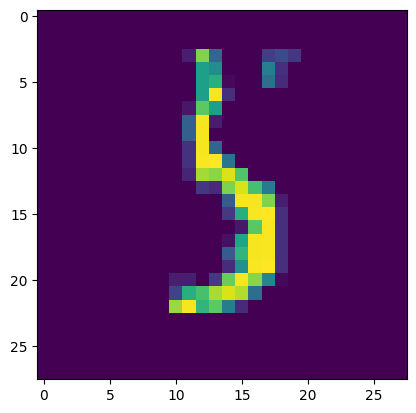

Predict: 3
Original: 5


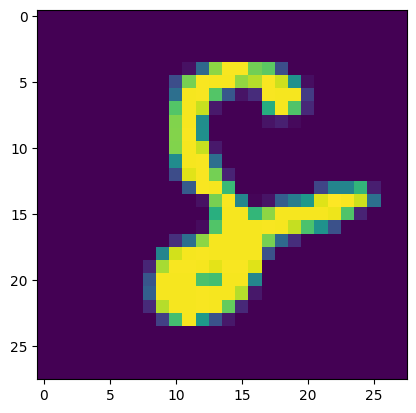

Predict: 2
Original: 8


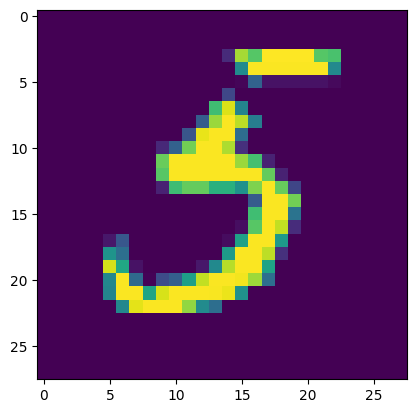

Predict: 3
Original: 5


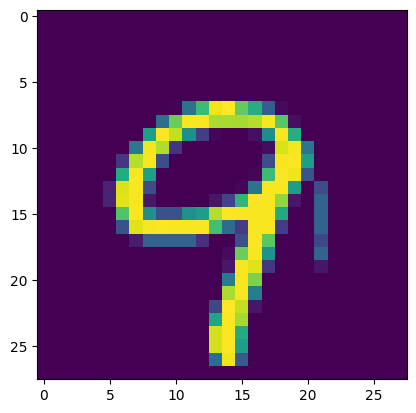

Predict: 7
Original: 9


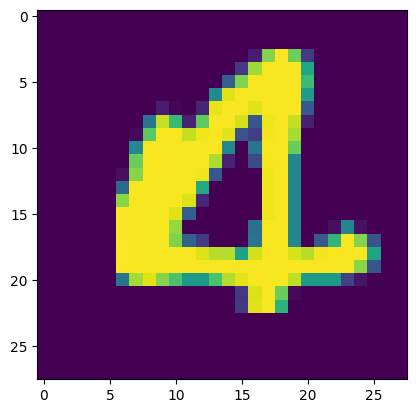

Predict: 0
Original: 4


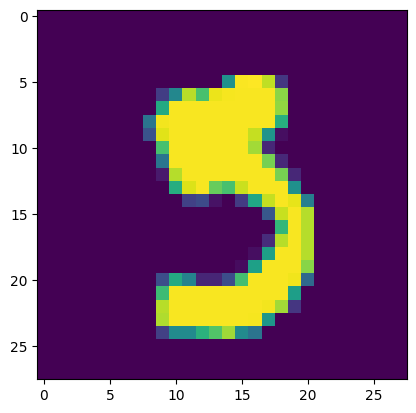

Predict: 3
Original: 5


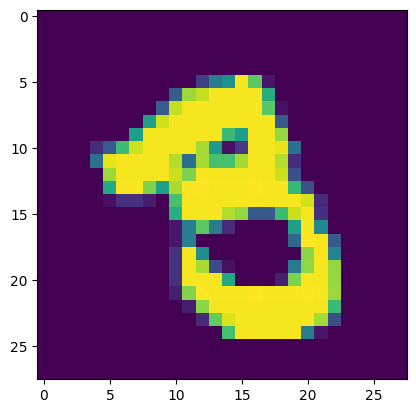

Predict: 8
Original: 3


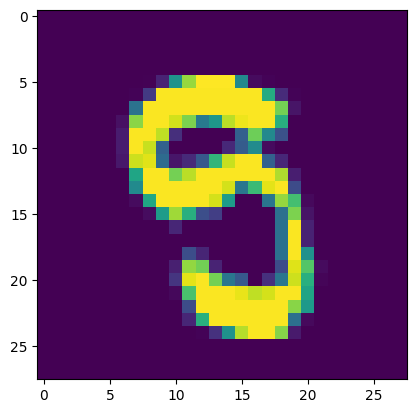

Predict: 9
Original: 5


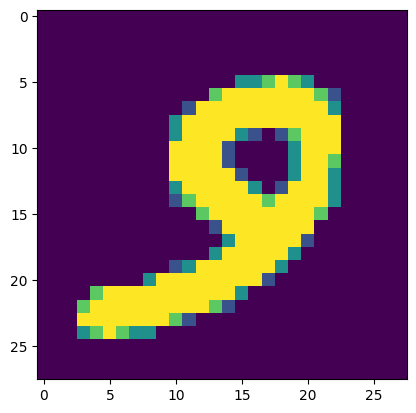

Predict: 0
Original: 9


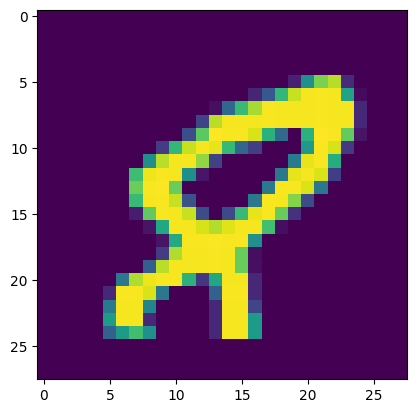

Predict: 7
Original: 8


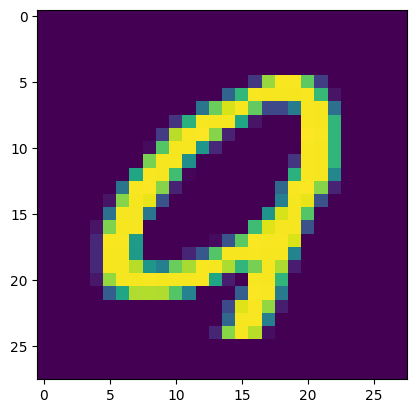

Predict: 0
Original: 9


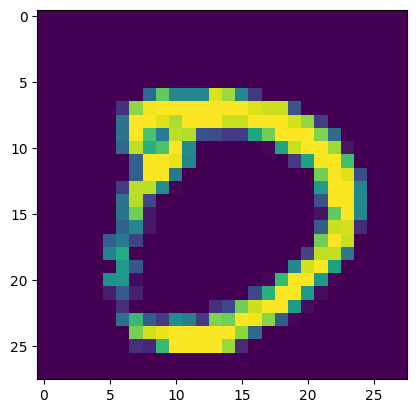

Predict: 7
Original: 0


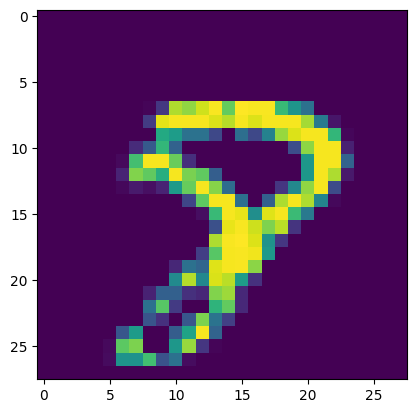

Predict: 7
Original: 8


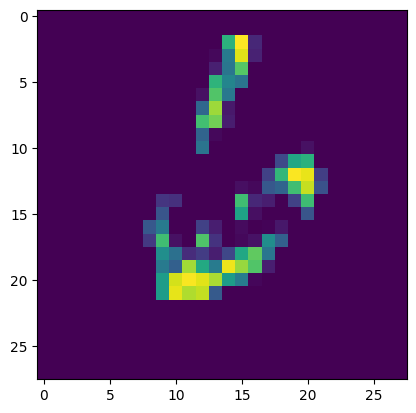

Predict: 3
Original: 6


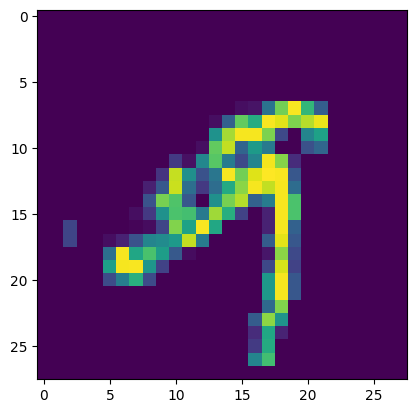

Predict: 5
Original: 9


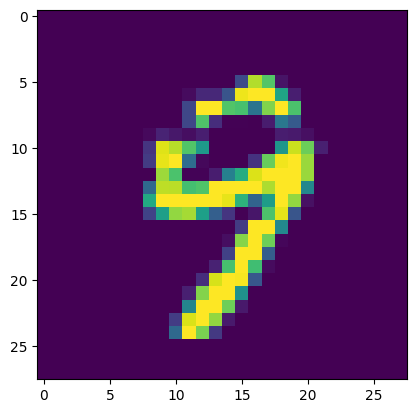

Predict: 3
Original: 9


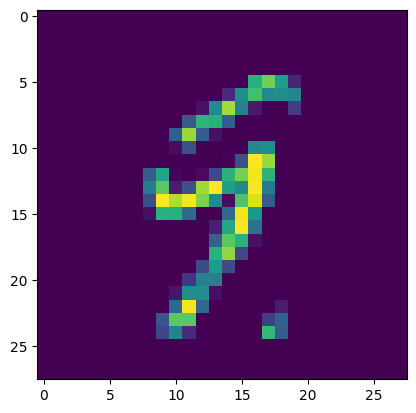

Predict: 3
Original: 9


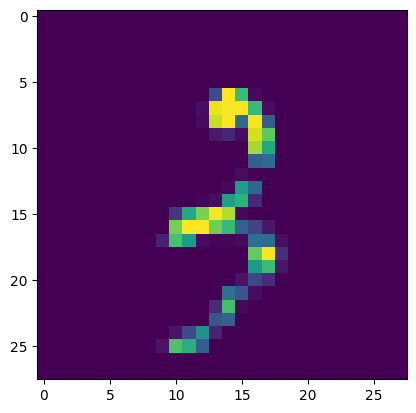

Predict: 7
Original: 3


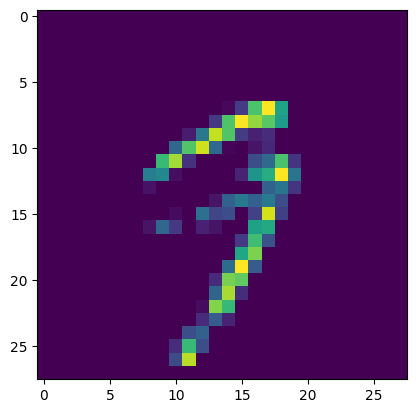

Predict: 7
Original: 9


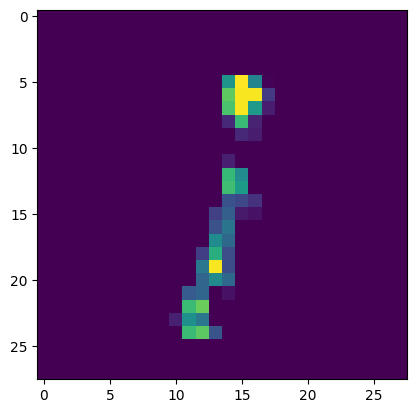

Predict: 3
Original: 1


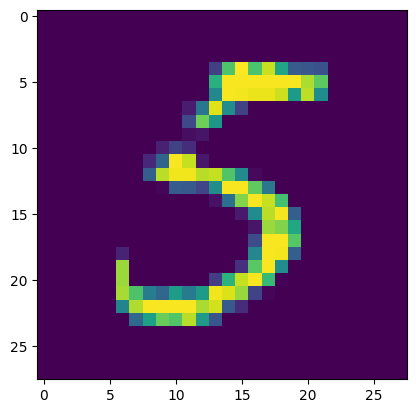

Predict: 3
Original: 5


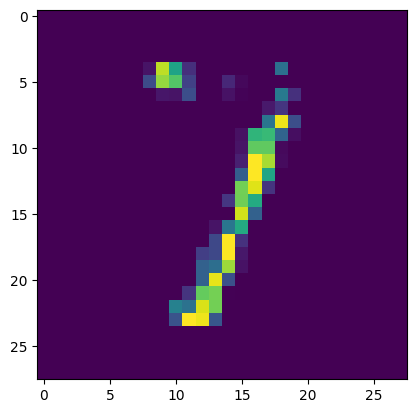

Predict: 1
Original: 7


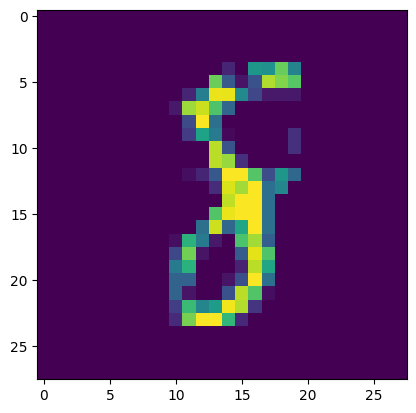

Predict: 3
Original: 8


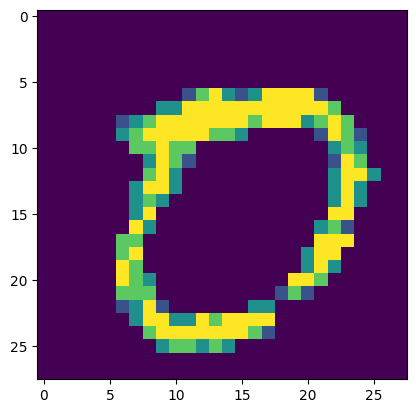

Predict: 7
Original: 0


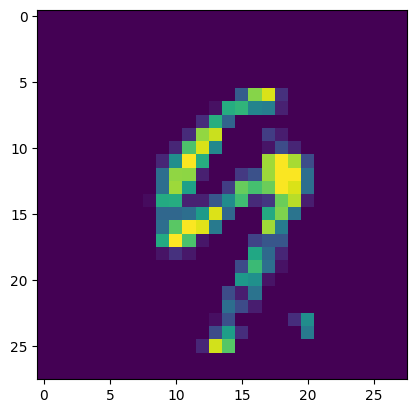

Predict: 3
Original: 9


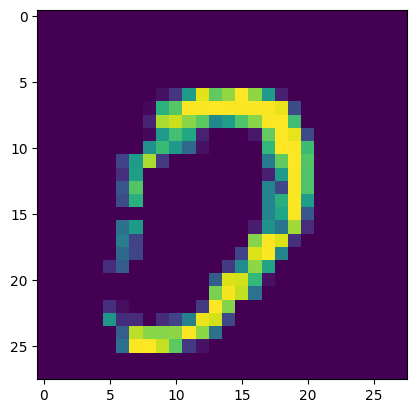

Predict: 7
Original: 0


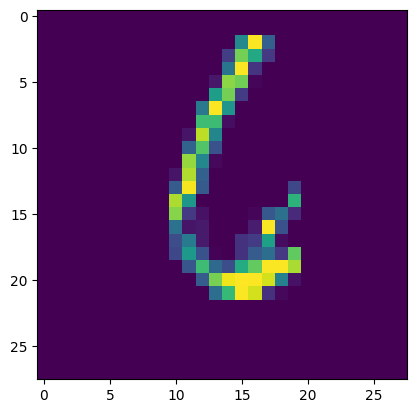

Predict: 1
Original: 6


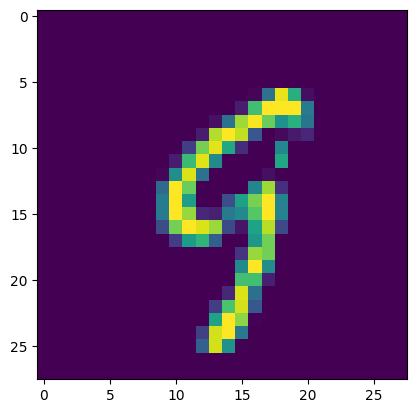

Predict: 5
Original: 9


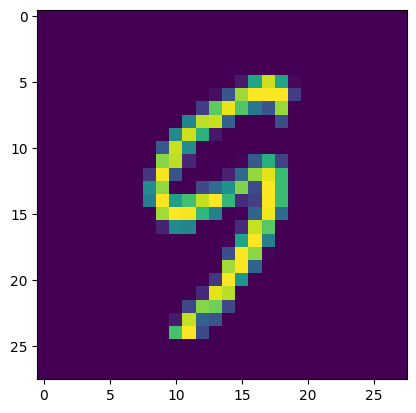

Predict: 5
Original: 9


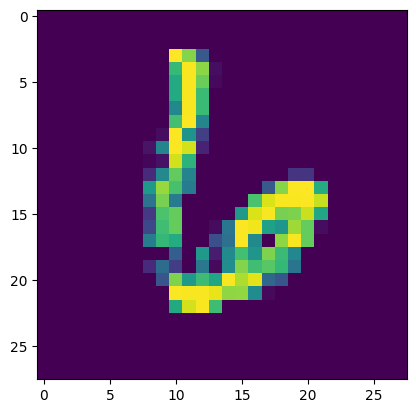

Predict: 3
Original: 6


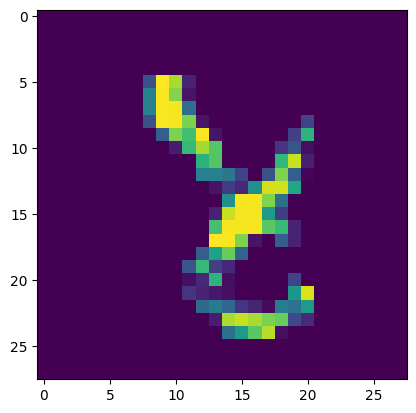

Predict: 1
Original: 8


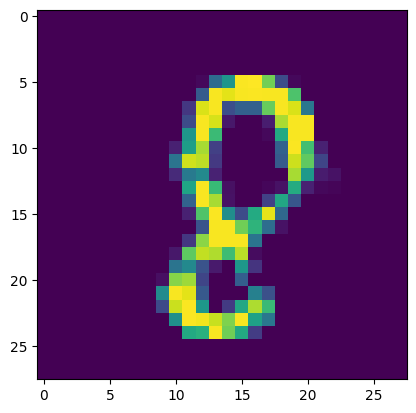

Predict: 2
Original: 8


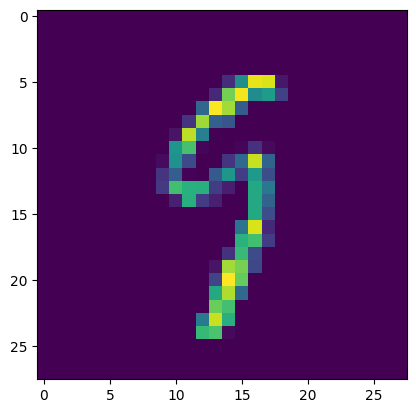

Predict: 3
Original: 9


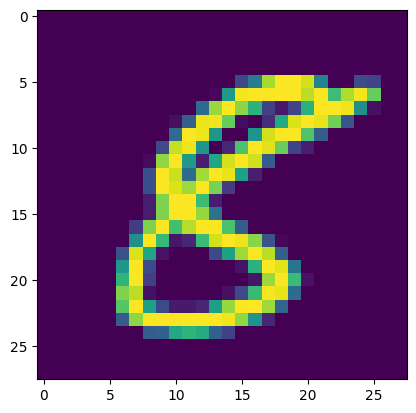

Predict: 5
Original: 8


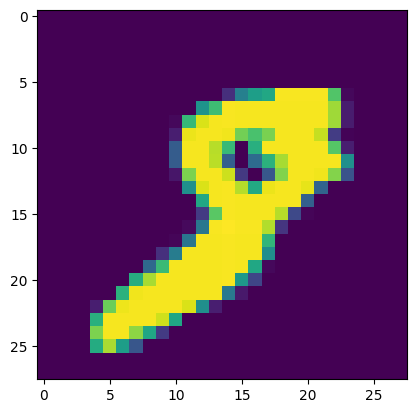

Predict: 7
Original: 8


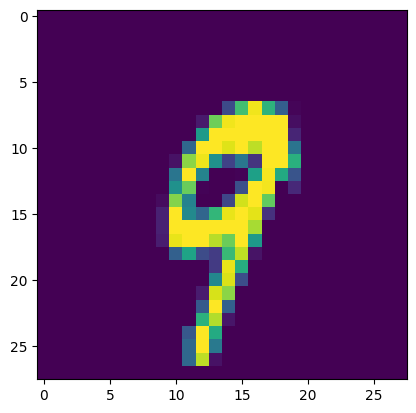

Predict: 7
Original: 9


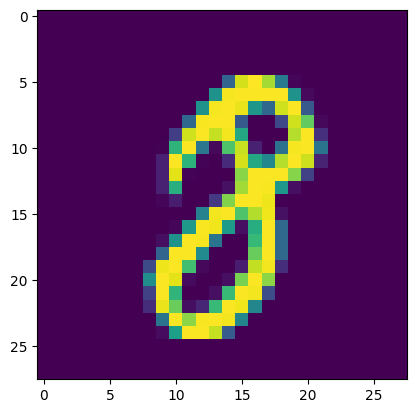

Predict: 3
Original: 8


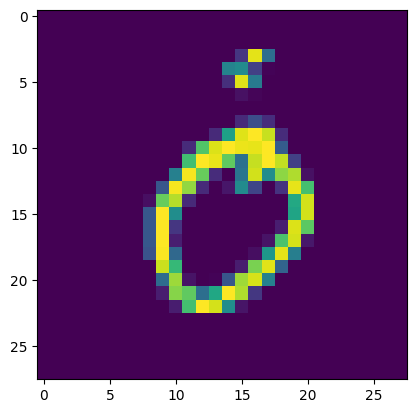

Predict: 5
Original: 0


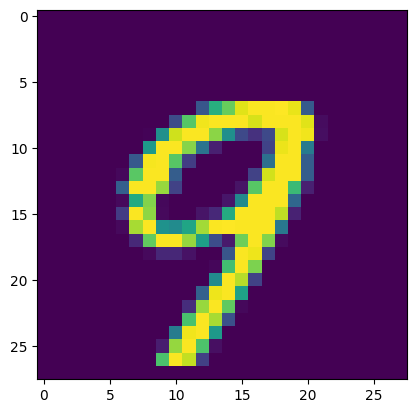

Predict: 7
Original: 9


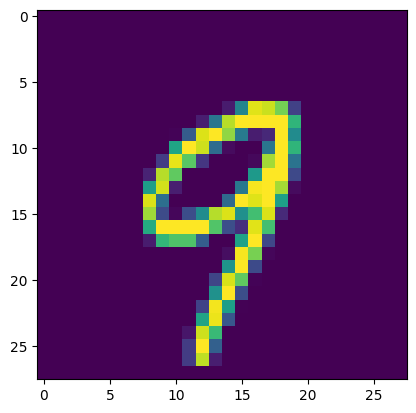

Predict: 7
Original: 9


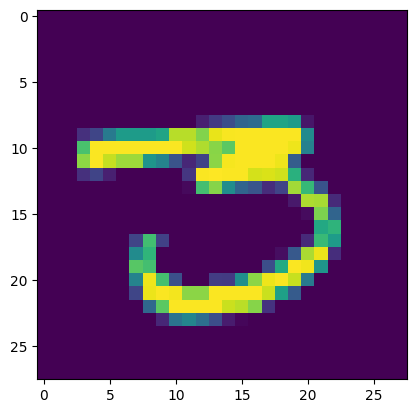

Predict: 7
Original: 3


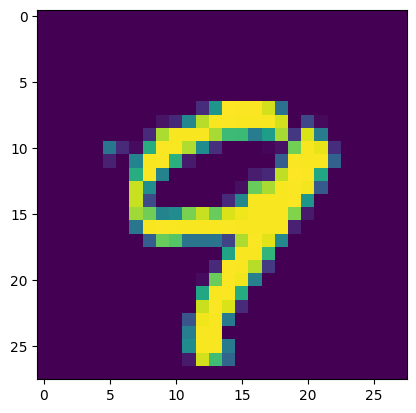

Predict: 7
Original: 9


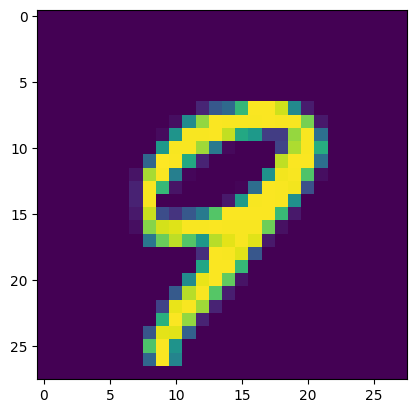

Predict: 7
Original: 9


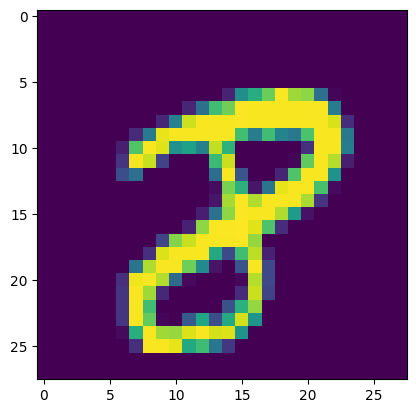

Predict: 2
Original: 8


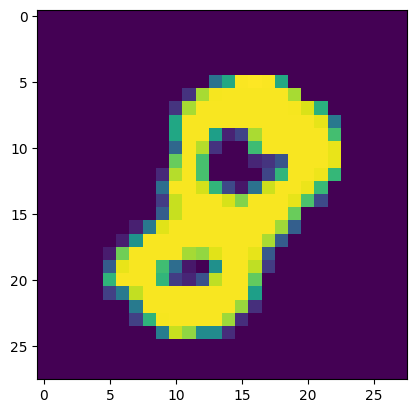

Predict: 0
Original: 8


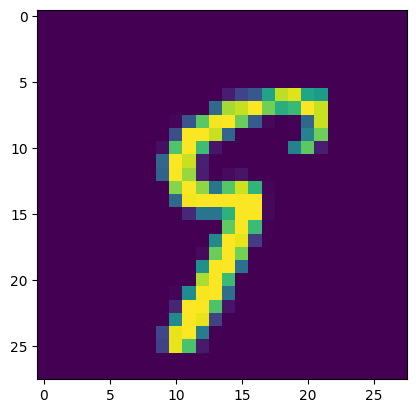

Predict: 5
Original: 9


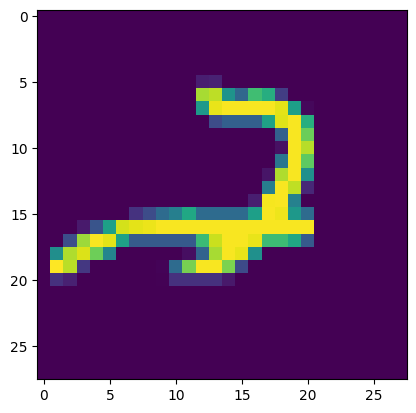

Predict: 7
Original: 2


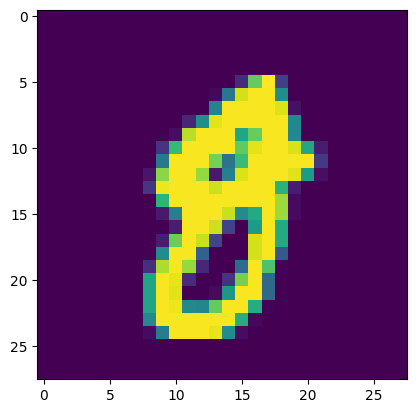

Predict: 0
Original: 8


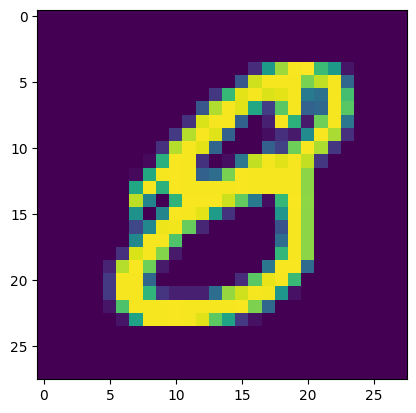

Predict: 0
Original: 8


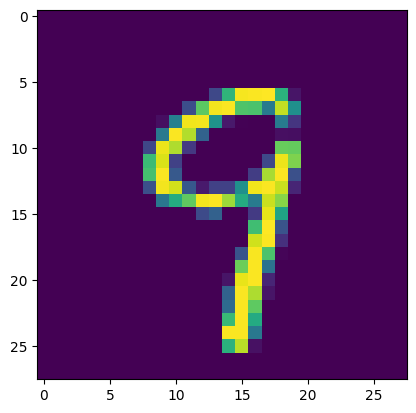

Predict: 7
Original: 9


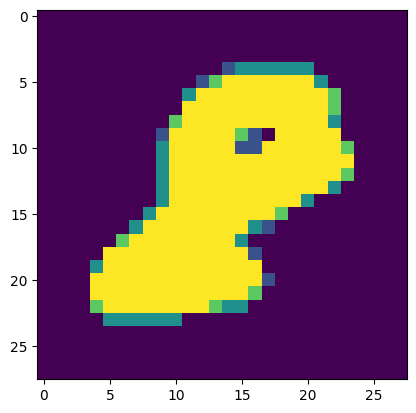

Predict: 2
Original: 8


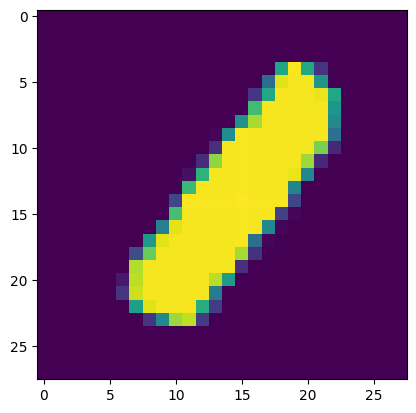

Predict: 0
Original: 1


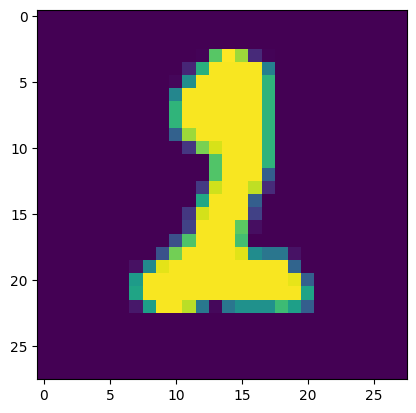

Predict: 1
Original: 2


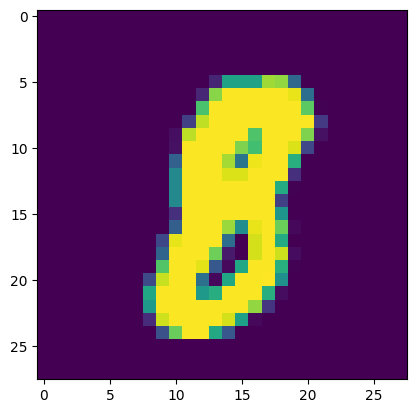

Predict: 0
Original: 8


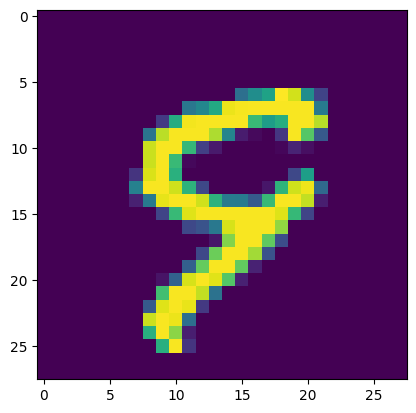

Predict: 7
Original: 9


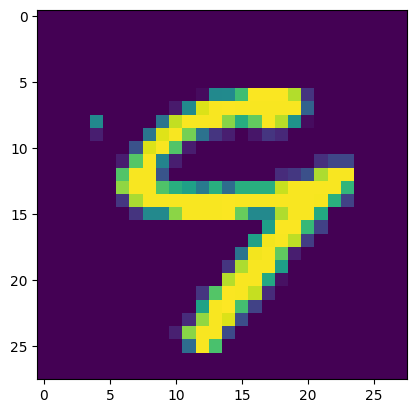

Predict: 7
Original: 9


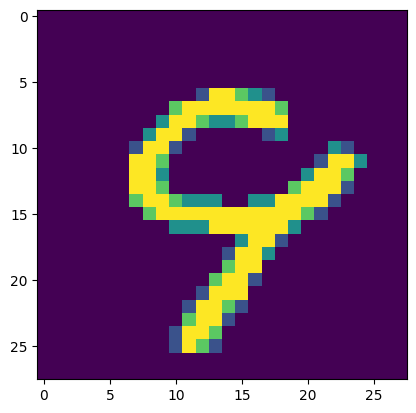

Predict: 7
Original: 9


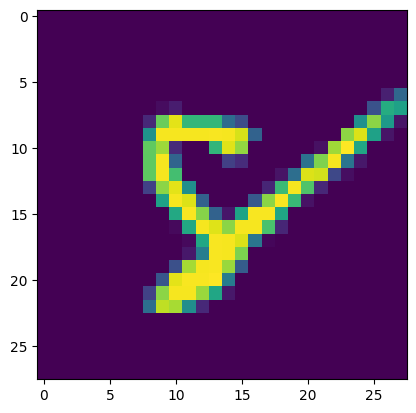

Predict: 4
Original: 8


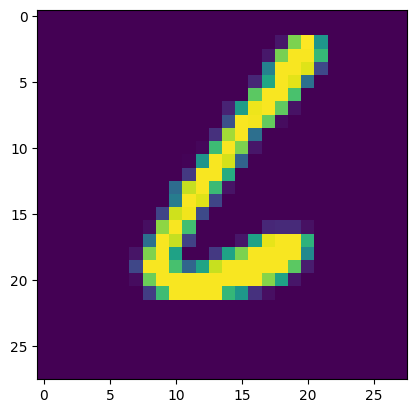

Predict: 1
Original: 6


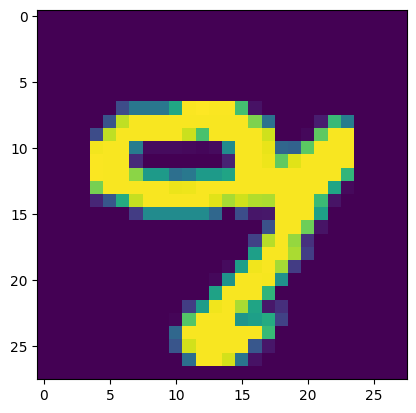

Predict: 7
Original: 9


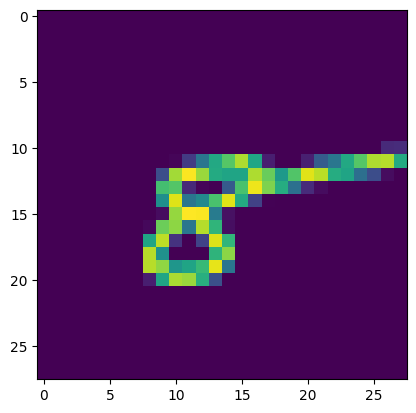

Predict: 5
Original: 8


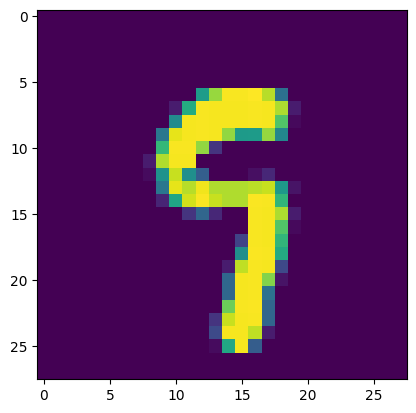

Predict: 5
Original: 9


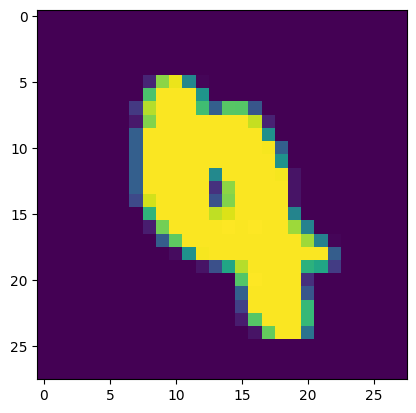

Predict: 9
Original: 4


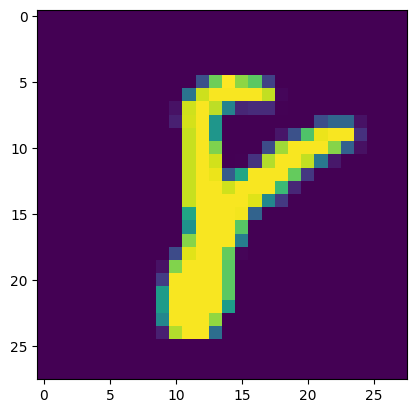

Predict: 5
Original: 8


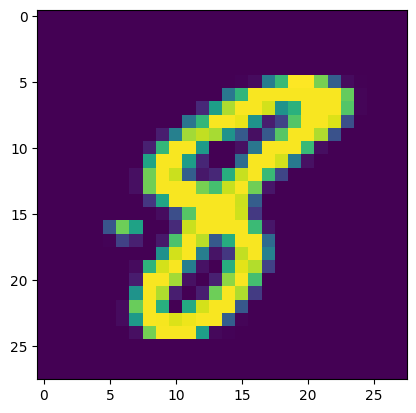

Predict: 3
Original: 8


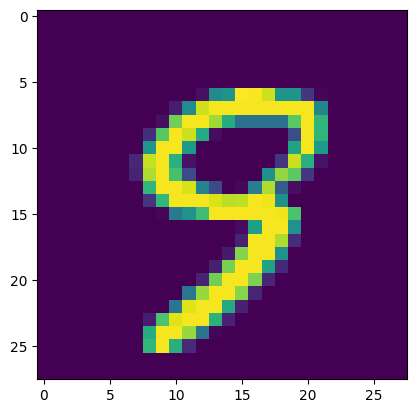

Predict: 3
Original: 9


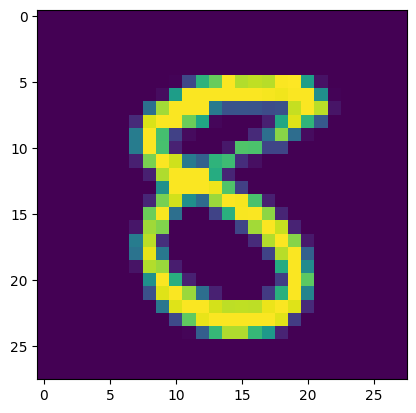

Predict: 5
Original: 8


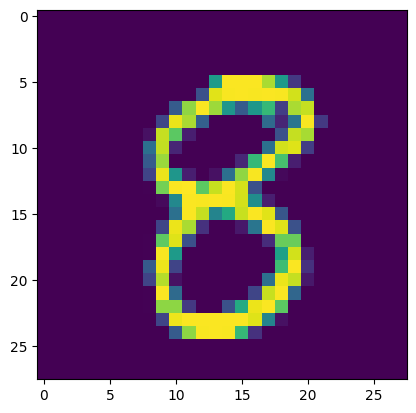

Predict: 3
Original: 8


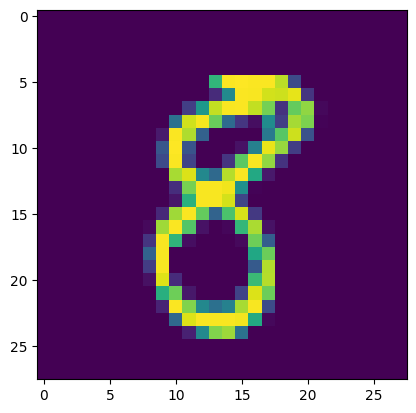

Predict: 3
Original: 8


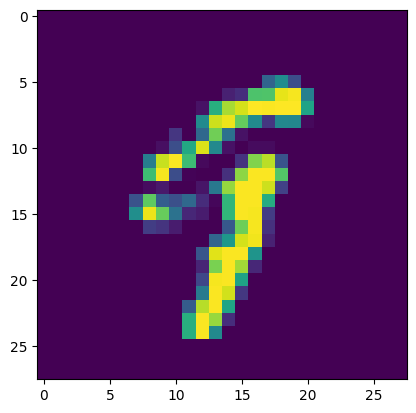

Predict: 3
Original: 9


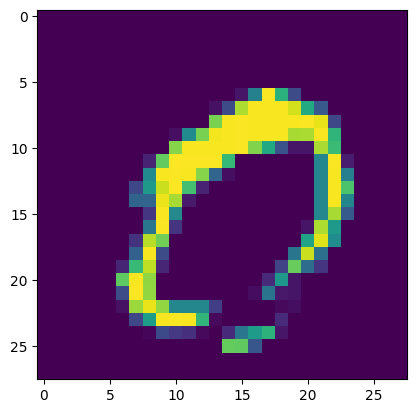

Predict: 7
Original: 0


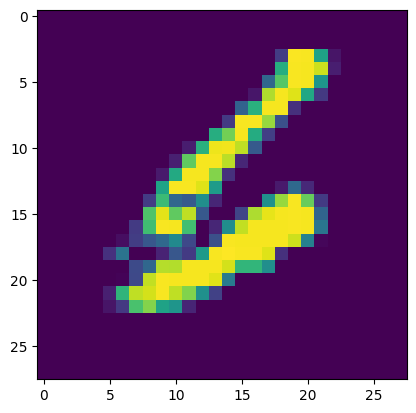

Predict: 5
Original: 6


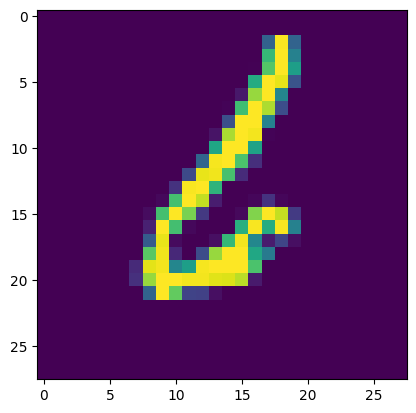

Predict: 1
Original: 6


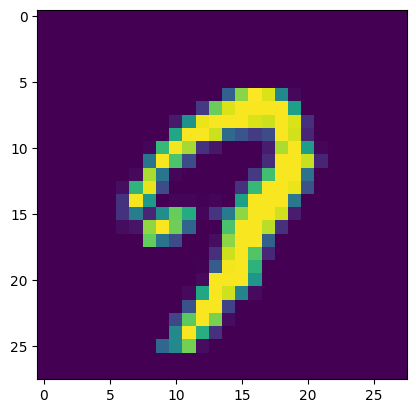

Predict: 7
Original: 9


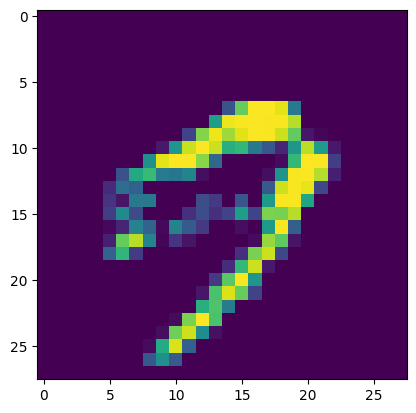

Predict: 7
Original: 9


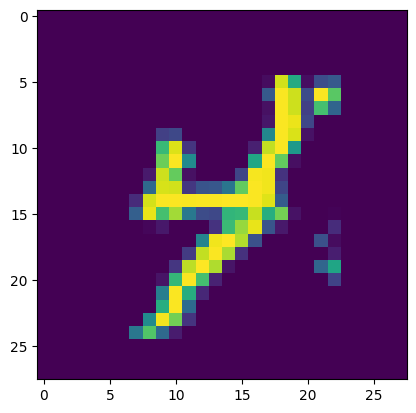

Predict: 7
Original: 4


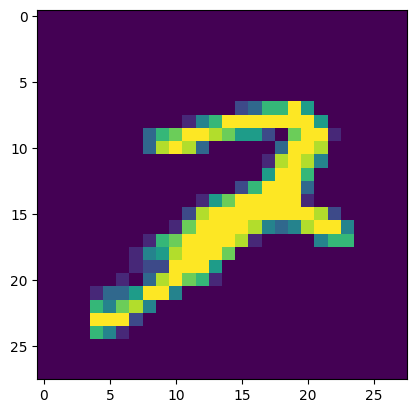

Predict: 7
Original: 2


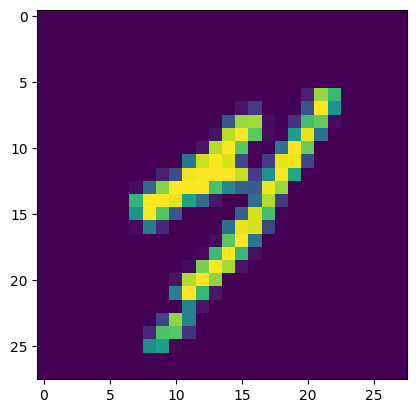

Predict: 7
Original: 4


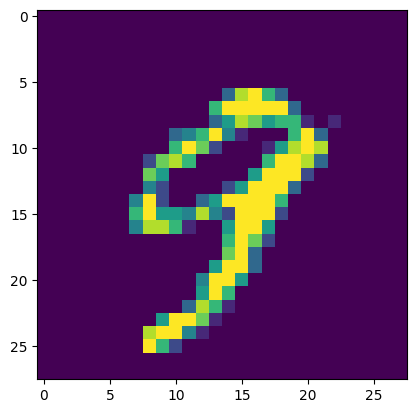

Predict: 3
Original: 9


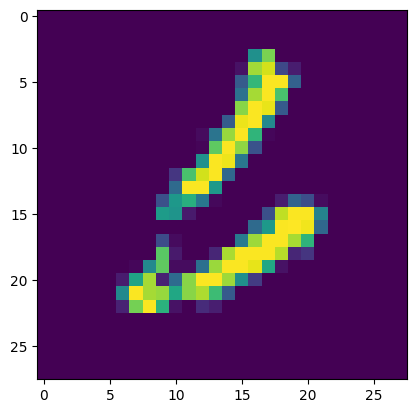

Predict: 1
Original: 6


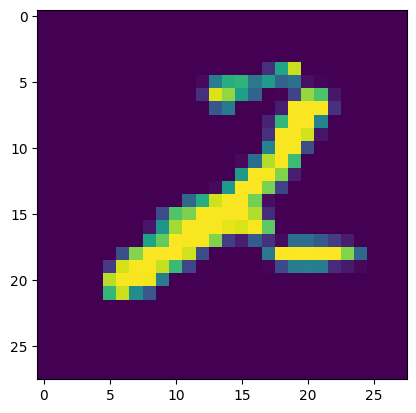

Predict: 7
Original: 2


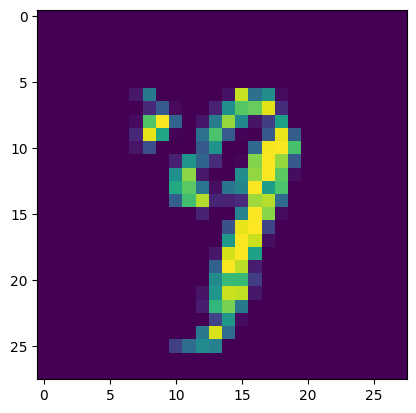

Predict: 7
Original: 9


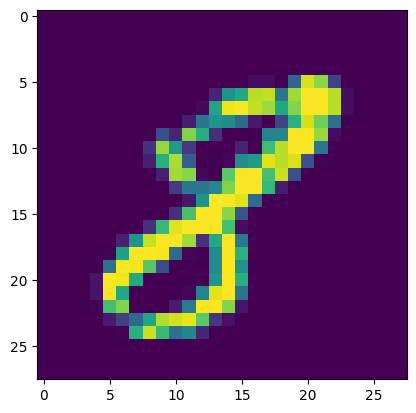

Predict: 3
Original: 8


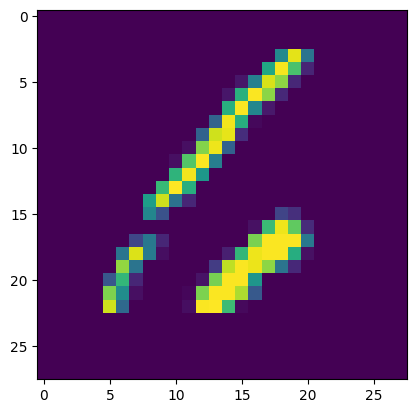

Predict: 1
Original: 6


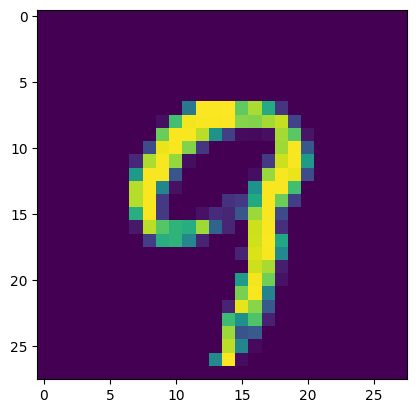

Predict: 7
Original: 9


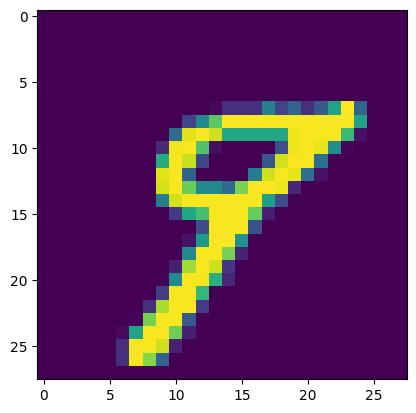

Predict: 7
Original: 9


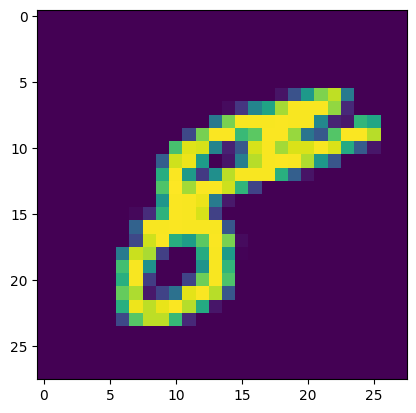

Predict: 5
Original: 8


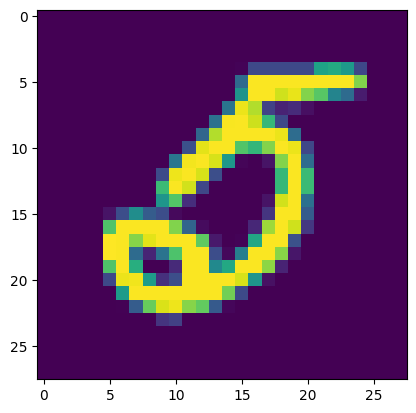

Predict: 0
Original: 5


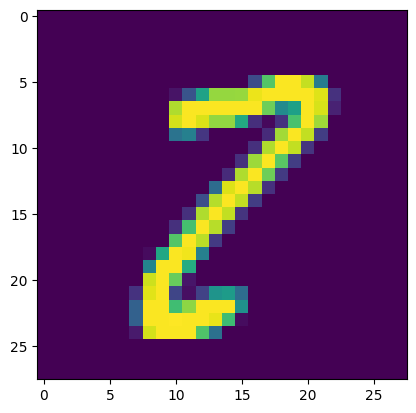

Predict: 7
Original: 2


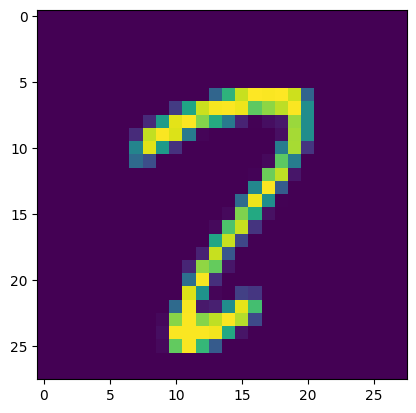

Predict: 7
Original: 2


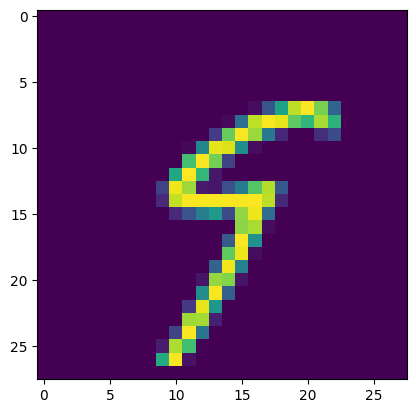

Predict: 5
Original: 9


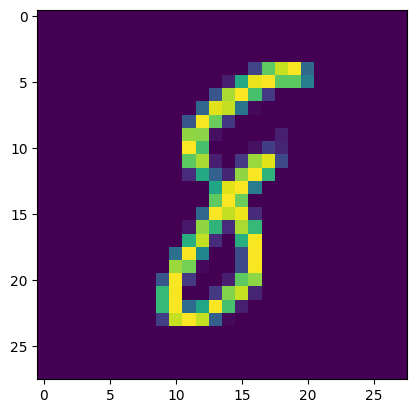

Predict: 3
Original: 8


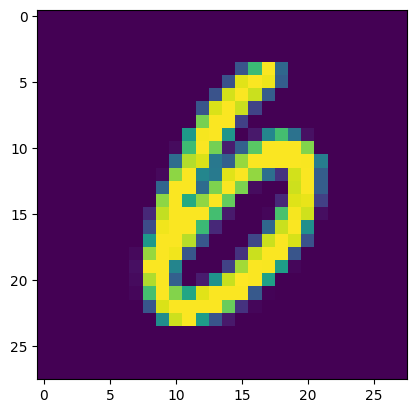

Predict: 0
Original: 6


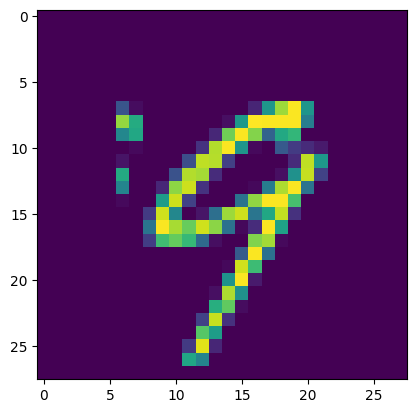

Predict: 3
Original: 9


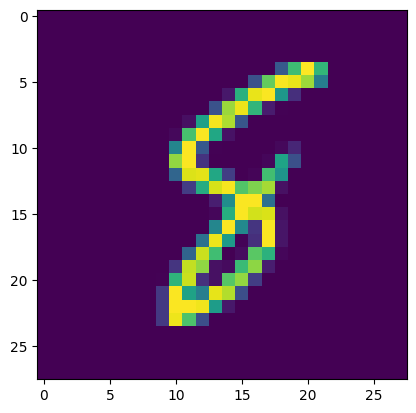

Predict: 5
Original: 8


In [10]:
for image_number in range(X_test.shape[0]):
    arr = np.array(X_test[image_number])
    arr = arr.reshape(1, 28, 28, 1)

    predicted_label = model.predict(arr, verbose=0).argmax()
    original_label = y_test[image_number]

    if (predicted_label != original_label):
        plt.imshow(X_test[image_number])
        plt.show()

        print(f"Predict: {predicted_label}")
        print(f"Original: {original_label}")